In [4]:
# ============================================================================
# Nashville Housing Value Analysis - Comprehensive Analysis
# Linear Regression | Decision Tree | Random Forest | Gradient Boost
# Complete Data Cleaning & Visualization
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

# Set professional style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [5]:
# ============================================================================
# PART 1: DATA LOADING AND COMPREHENSIVE CLEANING
# ============================================================================

print("="*80)
print("NASHVILLE HOUSING VALUE ANALYSIS")
print("Comprehensive Data Cleaning & Model Comparison")
print("="*80)

# Load dataset
df = pd.read_csv("Nashville_housing_data_CLEANED.csv")

print("\n1. INITIAL DATA OVERVIEW")
print("-" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

# Store original size
original_size = len(df)


NASHVILLE HOUSING VALUE ANALYSIS
Comprehensive Data Cleaning & Model Comparison

1. INITIAL DATA OVERVIEW
--------------------------------------------------------------------------------
Dataset Shape: (18146, 57)
Total Records: 18,146
Total Features: 57
Memory Usage: 7.89 MB

First 5 rows:
   Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0     0.17          3127       32000          134400     1149.00000   
1     0.11          9126       34000          157800     2090.82495   
2     0.17          3130       25000          243700     2145.60001   
3     0.34          3130       25000          138100     1969.00000   
4     0.17          3130       25000           86100     1037.00000   

   Year Built  Bedrooms  Full Bath  Half Bath  Sale Price Compared To Value  \
0        1941       2.0        1.0        0.0                             1   
1        2000       3.0        2.0        1.0                             1   
2        1948       4.0        2.0        0.


2. DATA QUALITY ASSESSMENT
--------------------------------------------------------------------------------

Duplicate Rows: 1
→ Removing 1 duplicate rows...
✓ Dataset size after removal: 18,145 rows

Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []

Data Types Summary:
int64      52
float64     5
Name: count, dtype: int64

Descriptive Statistics (Numerical Features):
            Acreage  Neighborhood     Land Value  Building Value  \
count  18145.000000  18145.000000   18145.000000    18145.000000   
mean       0.341082   4293.087903   39739.955911   133024.464040   
std        0.232733   1979.839542   35717.004784    78212.443533   
min        0.040000    107.000000     900.000000     1600.000000   
25%        0.190000   3127.000000   21500.000000    82200.000000   
50%        0.260000   4026.000000   27000.000000   110200.000000   
75%        0.390000   6227.000000   38500.000000   161300.000000   
max        1.240000   9528.00

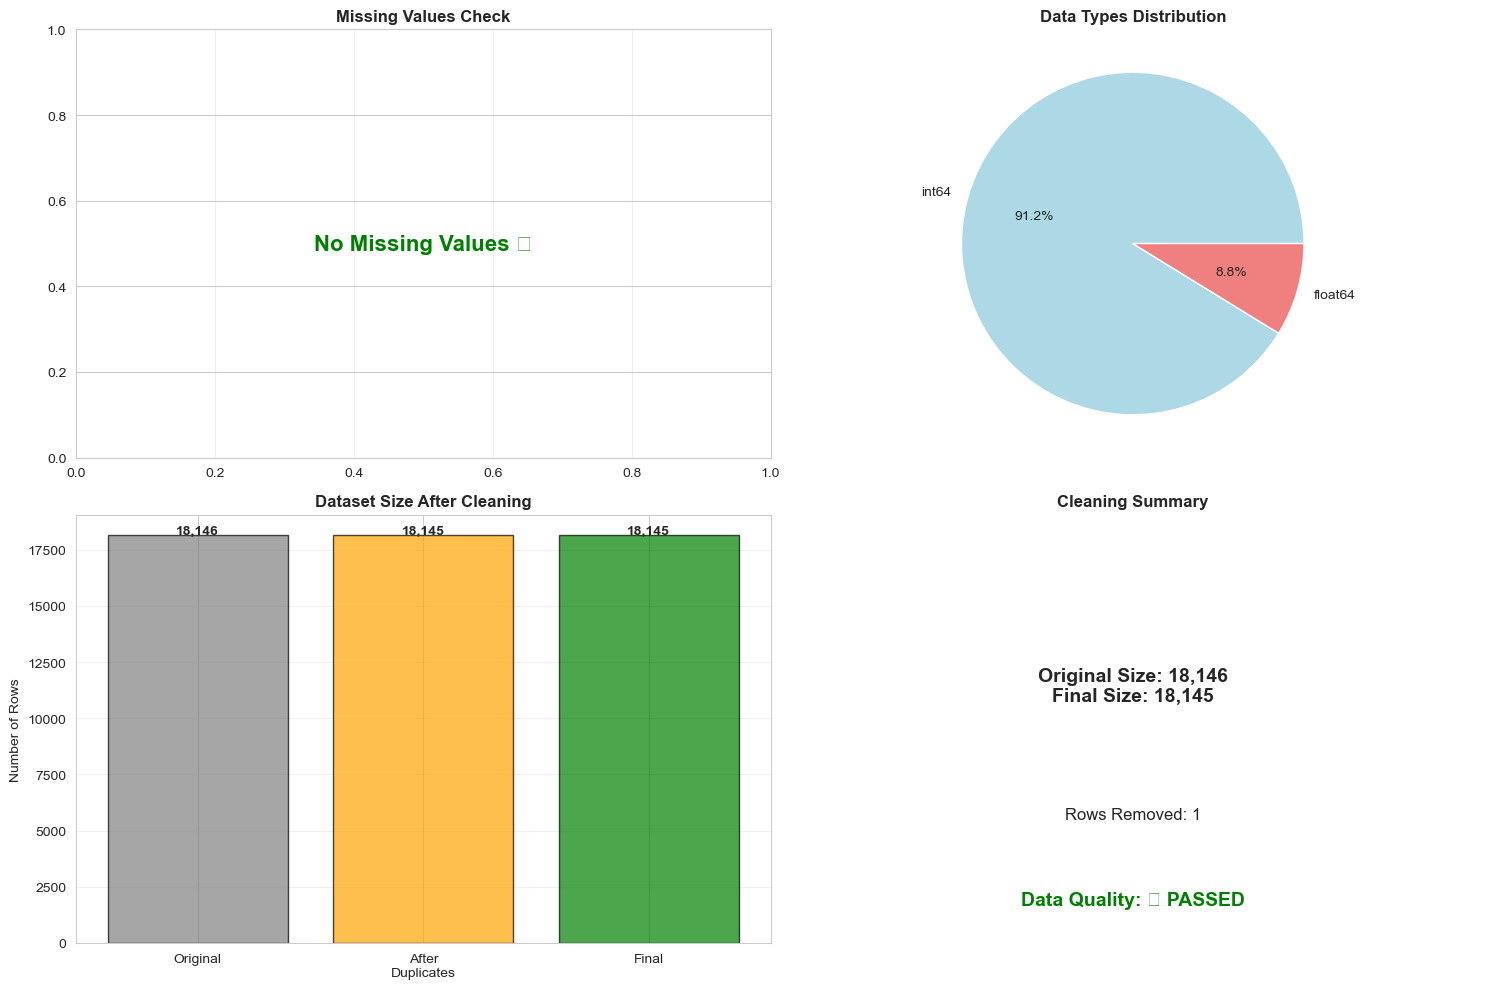

In [8]:
# ============================================================================
# COMPREHENSIVE DATA QUALITY ASSESSMENT
# ============================================================================

print("\n2. DATA QUALITY ASSESSMENT")
print("-" * 80)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    print(f"→ Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"✓ Dataset size after removal: {len(df):,} rows")

# Missing values analysis
print("\nMissing Values Analysis:")
missing_vals = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_vals.index,
    'Missing_Count': missing_vals.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

# Data types
print("\nData Types Summary:")
print(df.dtypes.value_counts())

# Basic statistics
print("\nDescriptive Statistics (Numerical Features):")
print(df.describe())

# Visualization 1: Data Quality Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Missing values
missing_top = missing_df[missing_df['Missing_Count'] > 0].head(15)
if len(missing_top) > 0:
    axes[0, 0].barh(missing_top['Column'], missing_top['Missing_Percentage'], color='coral')
    axes[0, 0].set_xlabel('Missing Percentage (%)')
    axes[0, 0].set_title('Missing Values by Column', fontweight='bold')
else:
    axes[0, 0].text(0.5, 0.5, 'No Missing Values ✓', 
                    ha='center', va='center', fontsize=16, color='green', fontweight='bold')
    axes[0, 0].set_title('Missing Values Check', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Data types distribution
dtype_counts = df.dtypes.astype(str).value_counts()
axes[0, 1].pie(dtype_counts, labels=dtype_counts.index, autopct='%1.1f%%',
               colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[0, 1].set_title('Data Types Distribution', fontweight='bold')

# Dataset size
cleaning_steps = ['Original', 'After\nDuplicates', 'Final']
sizes = [original_size, len(df), len(df)]
axes[1, 0].bar(cleaning_steps, sizes, color=['gray', 'orange', 'green'], 
               edgecolor='black', alpha=0.7)
axes[1, 0].set_ylabel('Number of Rows')
axes[1, 0].set_title('Dataset Size After Cleaning', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sizes):
    axes[1, 0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# Summary
axes[1, 1].text(0.5, 0.6, f'Original Size: {original_size:,}\nFinal Size: {len(df):,}',
                ha='center', va='center', fontsize=14, fontweight='bold')
axes[1, 1].text(0.5, 0.3, f'Rows Removed: {original_size - len(df):,}',
                ha='center', va='center', fontsize=12)
axes[1, 1].text(0.5, 0.1, 'Data Quality: ✓ PASSED',
                ha='center', va='center', fontsize=14, color='green', fontweight='bold')
axes[1, 1].set_title('Cleaning Summary', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('01_data_quality_dashboard.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()


In [10]:
# ============================================================================
# HANDLE MISSING VALUES
# ============================================================================

print("\n3. HANDLING MISSING VALUES")
print("-" * 80)

# Numerical columns - fill with median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"✓ Filled {missing_count} missing values in '{col}' with median: {median_val:.2f}")

# Categorical columns - fill with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else "Unknown"
        df[col] = df[col].fillna(mode_val)
        print(f"✓ Filled {missing_count} missing values in '{col}' with mode: {mode_val}")

print(f"\n✓ All missing values handled")
print(f"Remaining missing values: {df.isnull().sum().sum()}")



3. HANDLING MISSING VALUES
--------------------------------------------------------------------------------

✓ All missing values handled
Remaining missing values: 0



4. OUTLIER DETECTION
--------------------------------------------------------------------------------
Total outlier values detected: 62,104
Percentage: 6.00%

Top 10 features with most outliers:
Bedrooms                                  7644
Sale Price Compared To Value              4365
Half Bath                                 4183
Property City_NASHVILLE                   4157
City_NASHVILLE                            4156
Grade_C                                   3860
Tax District_URBAN SERVICES DISTRICT      3730
Tax District_GENERAL SERVICES DISTRICT    3393
Foundation Type_FULL BSMT                 3095
Land Value                                2485
dtype: int64


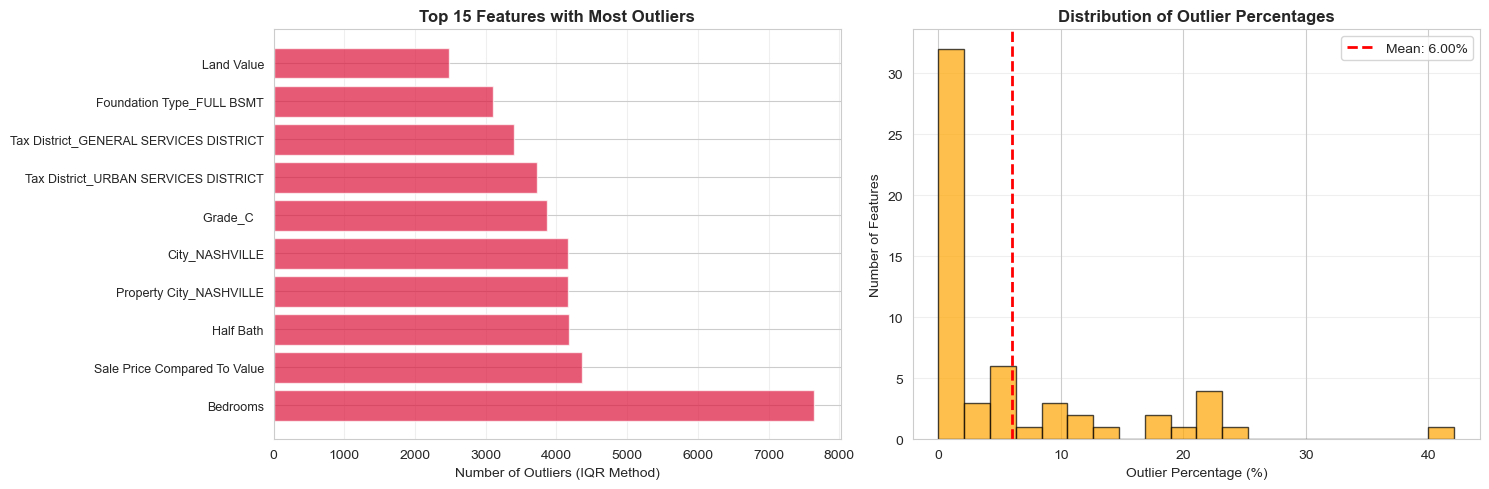

In [12]:
# ============================================================================
# OUTLIER DETECTION
# ============================================================================

print("\n4. OUTLIER DETECTION")
print("-" * 80)

# Detect outliers using IQR method
outlier_counts = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers

total_outliers = sum(outlier_counts.values())
print(f"Total outlier values detected: {total_outliers:,}")
print(f"Percentage: {total_outliers/(df.shape[0]*len(num_cols))*100:.2f}%")

print("\nTop 10 features with most outliers:")
outlier_series = pd.Series(outlier_counts).sort_values(ascending=False).head(10)
print(outlier_series)

# Visualization 2: Outlier Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Outlier counts
outlier_top = outlier_series.head(15)
axes[0].barh(range(len(outlier_top)), outlier_top.values, color='crimson', alpha=0.7)
axes[0].set_yticks(range(len(outlier_top)))
axes[0].set_yticklabels(outlier_top.index, fontsize=9)
axes[0].set_xlabel('Number of Outliers (IQR Method)')
axes[0].set_title('Top 15 Features with Most Outliers', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Outlier percentages
outlier_pcts = [(count/len(df))*100 for count in outlier_counts.values()]
axes[1].hist(outlier_pcts, bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(np.mean(outlier_pcts), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {np.mean(outlier_pcts):.2f}%')
axes[1].set_xlabel('Outlier Percentage (%)')
axes[1].set_ylabel('Number of Features')
axes[1].set_title('Distribution of Outlier Percentages', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('02_outlier_analysis.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

# Note: We keep outliers as they may contain valuable information about extreme properties



5. TARGET VARIABLE ANALYSIS
--------------------------------------------------------------------------------
Target Variable: 'Sale Price Compared To Value'

Target Statistics:
count    18145.000000
mean         0.759438
std          0.427437
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Sale Price Compared To Value, dtype: float64


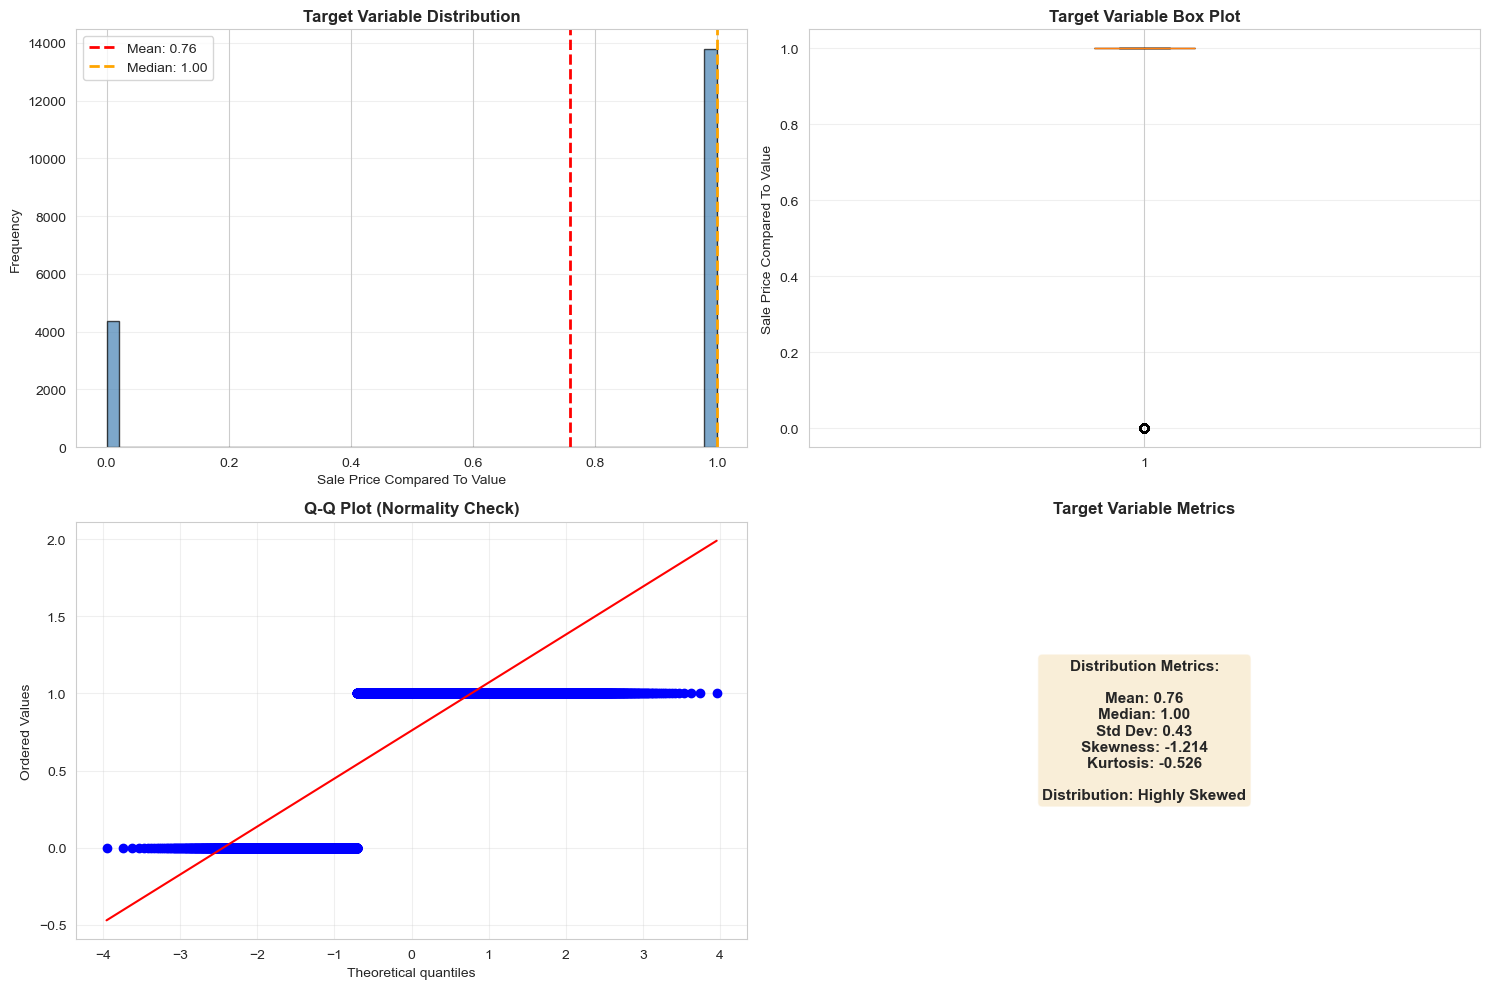

In [14]:
# ============================================================================
# TARGET VARIABLE ANALYSIS
# ============================================================================

print("\n5. TARGET VARIABLE ANALYSIS")
print("-" * 80)

target = "Sale Price Compared To Value"
print(f"Target Variable: '{target}'")
print(f"\nTarget Statistics:")
print(df[target].describe())

# Visualization 3: Target Variable Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df[target], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df[target].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df[target].mean():.2f}')
axes[0, 0].axvline(df[target].median(), color='orange', linestyle='--',
                   linewidth=2, label=f'Median: {df[target].median():.2f}')
axes[0, 0].set_xlabel('Sale Price Compared To Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Target Variable Distribution', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Box plot
axes[0, 1].boxplot(df[target], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[0, 1].set_ylabel('Sale Price Compared To Value')
axes[0, 1].set_title('Target Variable Box Plot', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Q-Q plot
stats.probplot(df[target], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Skewness and Kurtosis
skew = df[target].skew()
kurt = df[target].kurtosis()
metrics_text = f"Distribution Metrics:\n\n"
metrics_text += f"Mean: {df[target].mean():.2f}\n"
metrics_text += f"Median: {df[target].median():.2f}\n"
metrics_text += f"Std Dev: {df[target].std():.2f}\n"
metrics_text += f"Skewness: {skew:.3f}\n"
metrics_text += f"Kurtosis: {kurt:.3f}\n\n"
if abs(skew) < 0.5:
    metrics_text += "Distribution: Fairly Symmetric"
elif abs(skew) < 1:
    metrics_text += "Distribution: Moderately Skewed"
else:
    metrics_text += "Distribution: Highly Skewed"

axes[1, 1].text(0.5, 0.5, metrics_text, ha='center', va='center',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].set_title('Target Variable Metrics', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('03_target_distribution.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()


In [16]:
# ============================================================================
# FEATURE ENGINEERING & ENCODING
# ============================================================================

print("\n6. FEATURE ENGINEERING & ENCODING")
print("-" * 80)

# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")
print(categorical_cols[:10] if len(categorical_cols) > 10 else categorical_cols)

# One-hot encoding
print("\nApplying one-hot encoding...")
df_encoded = pd.get_dummies(df, drop_first=True)
print(f"✓ Features after encoding: {df_encoded.shape[1]}")



6. FEATURE ENGINEERING & ENCODING
--------------------------------------------------------------------------------
Categorical columns: 0
[]

Applying one-hot encoding...
✓ Features after encoding: 57



7. CORRELATION ANALYSIS
--------------------------------------------------------------------------------

Top 10 Positive Correlations with Target:
Grade_C                                 0.052122
Land Value                              0.051420
Exterior Wall_BRICK/FRAME               0.030094
Tax District_URBAN SERVICES DISTRICT    0.027345
Property City_HERMITAGE                 0.025097
City_HERMITAGE                          0.025097
Property City_BRENTWOOD                 0.018533
Foundation Type_SLAB                    0.018293
City_BRENTWOOD                          0.018172
Land Use_SINGLE FAMILY                  0.018156
Name: Sale Price Compared To Value, dtype: float64

Top 10 Negative Correlations with Target:
Tax District_GENERAL SERVICES DISTRICT   -0.027042
Finished Area                            -0.027370
Grade_B                                  -0.029122
Grade_D                                  -0.029580
Grade_E                                  -0.034366
Land Use_RES

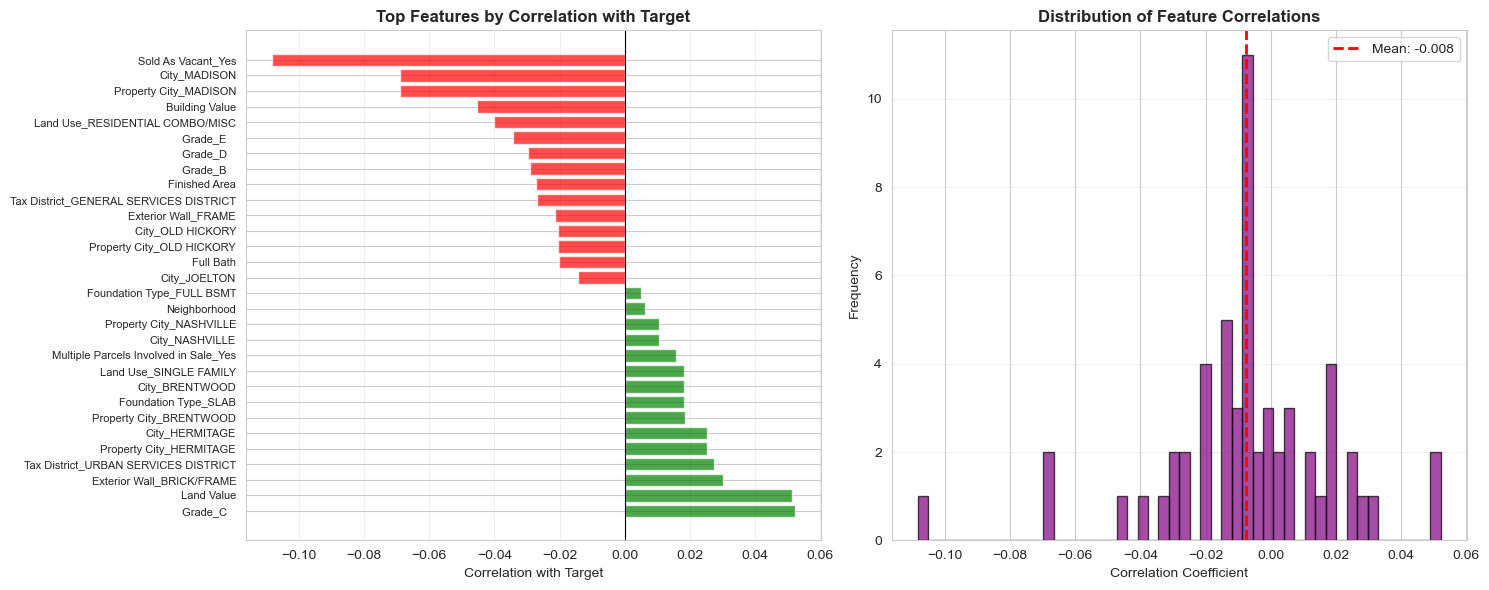

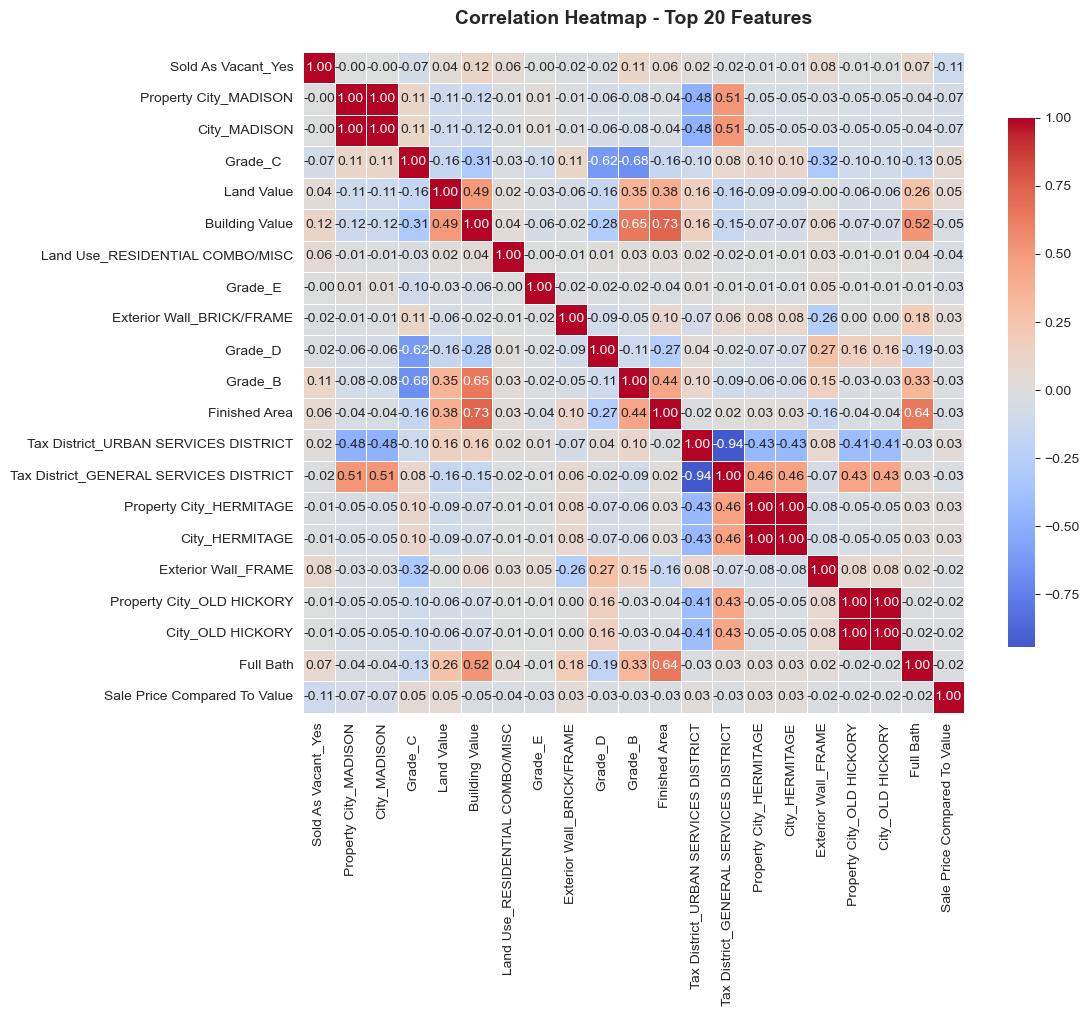

In [18]:
# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("\n7. CORRELATION ANALYSIS")
print("-" * 80)

# Calculate correlations with target
correlations = df_encoded.corr()[target].drop(target).sort_values(ascending=False)
print(f"\nTop 10 Positive Correlations with Target:")
print(correlations.head(10))

print(f"\nTop 10 Negative Correlations with Target:")
print(correlations.tail(10))

# Visualization 4: Correlation Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top correlations
top_corr = pd.concat([correlations.head(15), correlations.tail(15)])
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
axes[0].barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index, fontsize=8)
axes[0].set_xlabel('Correlation with Target')
axes[0].set_title('Top Features by Correlation with Target', fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='x', alpha=0.3)

# Correlation distribution
axes[1].hist(correlations.values, bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1].axvline(correlations.mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean: {correlations.mean():.3f}')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Feature Correlations', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('04_correlation_analysis.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 5: Correlation Heatmap (Top Features)
top_features = correlations.abs().nlargest(20).index.tolist()
top_features.append(target)
corr_matrix = df_encoded[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 20 Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('05_correlation_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()



8. PREPARING DATA FOR MODELING
--------------------------------------------------------------------------------
Feature matrix shape: (18145, 56)
Target vector shape: (18145,)

Train set: 12,701 samples (70.0%)
Test set:  5,444 samples (30.0%)

✓ Feature scaling complete


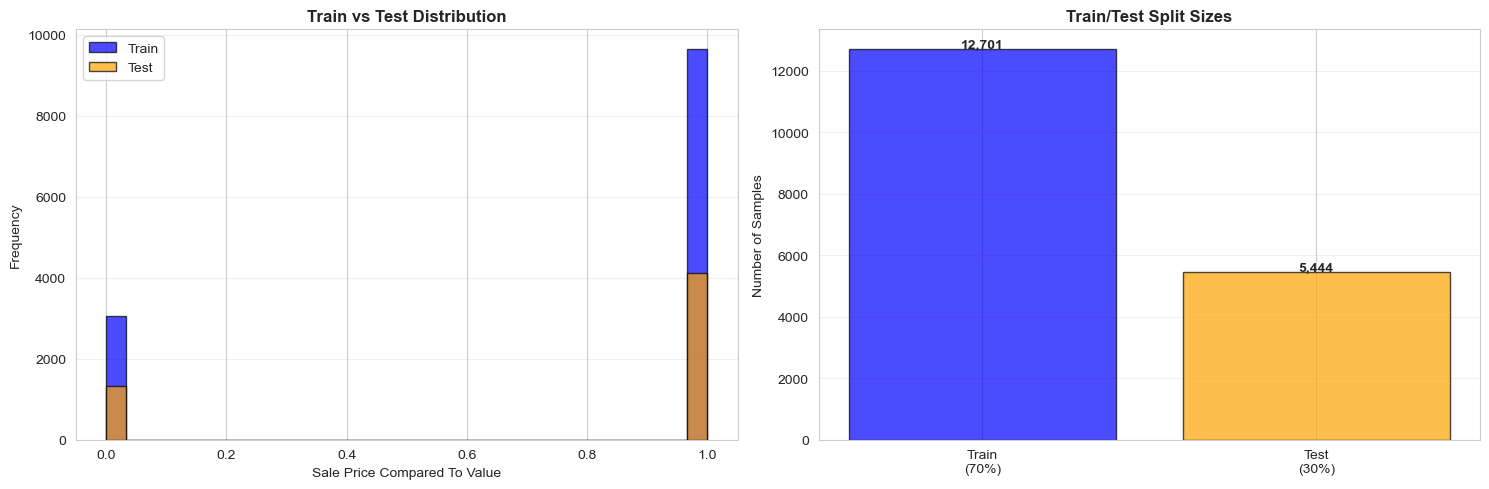

In [19]:
# ============================================================================
# PREPARE DATA FOR MODELING
# ============================================================================

print("\n8. PREPARING DATA FOR MODELING")
print("-" * 80)

# Separate features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(f"\nTrain set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Feature Scaling (for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Feature scaling complete")

# Visualization 6: Train/Test Split Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution comparison
axes[0].hist(y_train, bins=30, alpha=0.7, label='Train', color='blue', edgecolor='black')
axes[0].hist(y_test, bins=30, alpha=0.7, label='Test', color='orange', edgecolor='black')
axes[0].set_xlabel('Sale Price Compared To Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Train vs Test Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Split sizes
split_data = ['Train\n(70%)', 'Test\n(30%)']
split_sizes = [len(X_train), len(X_test)]
axes[1].bar(split_data, split_sizes, color=['blue', 'orange'], 
            edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Number of Samples')
axes[1].set_title('Train/Test Split Sizes', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(split_sizes):
    axes[1].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('06_train_test_split.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()



PART 2: LINEAR REGRESSION MODEL

Linear Regression Performance:
------------------------------------------------------------
Training RMSE: 0.42
Test RMSE:     0.42
Training R²:   0.0374
Test R²:       0.0278
Test MAE:      0.35


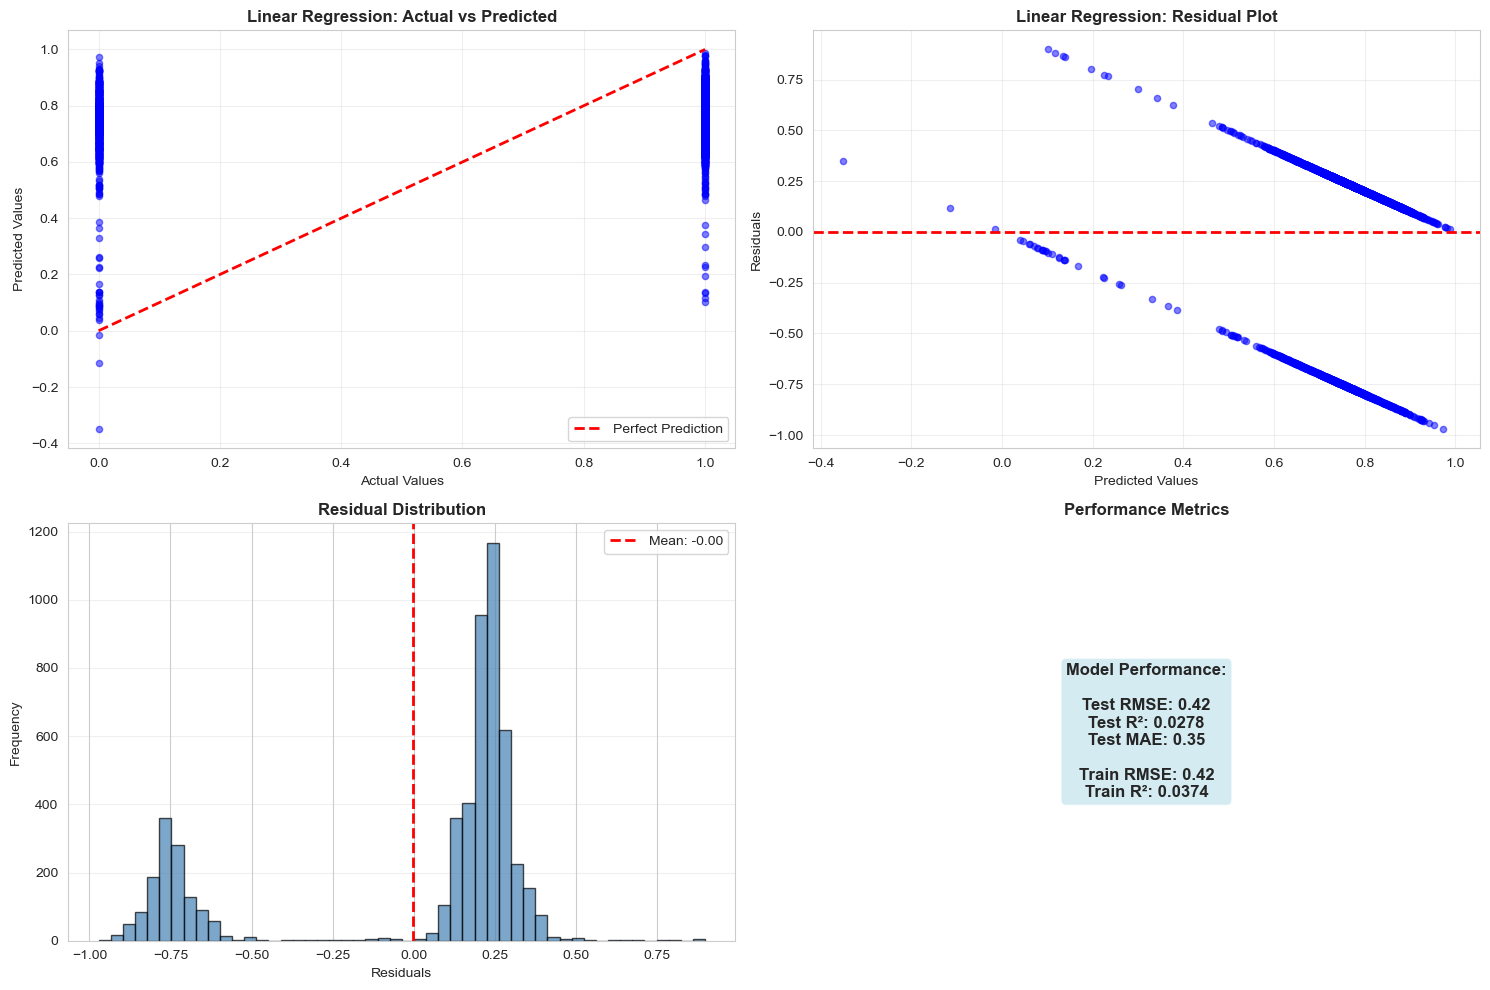


Top 10 Most Important Features (by coefficient magnitude):
                         Feature   Coefficient
30              City_OLD HICKORY -4.429764e+12
19     Property City_OLD HICKORY  4.429764e+12
25                City_HERMITAGE -2.067808e+12
14       Property City_HERMITAGE  2.067808e+12
18       Property City_NASHVILLE -1.606477e+12
29                City_NASHVILLE  1.606285e+12
15         Property City_JOELTON -1.075800e+12
26                  City_JOELTON  1.075800e+12
13  Property City_GOODLETTSVILLE -1.038523e+12
24           City_GOODLETTSVILLE  1.038523e+12


In [22]:
# ============================================================================
# PART 2: LINEAR REGRESSION MODEL
# ============================================================================

print("\n" + "="*80)
print("PART 2: LINEAR REGRESSION MODEL")
print("="*80)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
lr_train_preds = lr.predict(X_train_scaled)
lr_test_preds = lr.predict(X_test_scaled)

# Metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_preds))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_preds))
lr_train_r2 = r2_score(y_train, lr_train_preds)
lr_test_r2 = r2_score(y_test, lr_test_preds)
lr_test_mae = mean_absolute_error(y_test, lr_test_preds)

print("\nLinear Regression Performance:")
print("-" * 60)
print(f"Training RMSE: {lr_train_rmse:,.2f}")
print(f"Test RMSE:     {lr_test_rmse:,.2f}")
print(f"Training R²:   {lr_train_r2:.4f}")
print(f"Test R²:       {lr_test_r2:.4f}")
print(f"Test MAE:      {lr_test_mae:,.2f}")

# Visualization 7: Linear Regression Results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Actual vs Predicted
axes[0, 0].scatter(y_test, lr_test_preds, alpha=0.5, s=20, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Linear Regression: Actual vs Predicted', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residual plot
residuals = y_test - lr_test_preds
axes[0, 1].scatter(lr_test_preds, residuals, alpha=0.5, s=20, color='blue')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Linear Regression: Residual Plot', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Residual distribution
axes[1, 0].hist(residuals, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {residuals.mean():.2f}')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Performance metrics
metrics_text = f"Model Performance:\n\n"
metrics_text += f"Test RMSE: {lr_test_rmse:,.2f}\n"
metrics_text += f"Test R²: {lr_test_r2:.4f}\n"
metrics_text += f"Test MAE: {lr_test_mae:,.2f}\n\n"
metrics_text += f"Train RMSE: {lr_train_rmse:,.2f}\n"
metrics_text += f"Train R²: {lr_train_r2:.4f}"

axes[1, 1].text(0.5, 0.5, metrics_text, ha='center', va='center',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[1, 1].set_title('Performance Metrics', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('07_linear_regression_results.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

# Feature importance for Linear Regression
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features (by coefficient magnitude):")
print(feature_importance_lr.head(10))



PART 3: DECISION TREE MODEL

Testing different tree depths...
Depth= 3: CV RMSE = 0.42
Depth= 5: CV RMSE = 0.42
Depth= 7: CV RMSE = 0.43
Depth=10: CV RMSE = 0.44
Depth=15: CV RMSE = 0.50
Depth=20: CV RMSE = 0.56

✓ Optimal depth: 3

Decision Tree Performance:
------------------------------------------------------------
Training RMSE: 0.42
Test RMSE:     0.42
Training R²:   0.0268
Test R²:       0.0172
Test MAE:      0.36


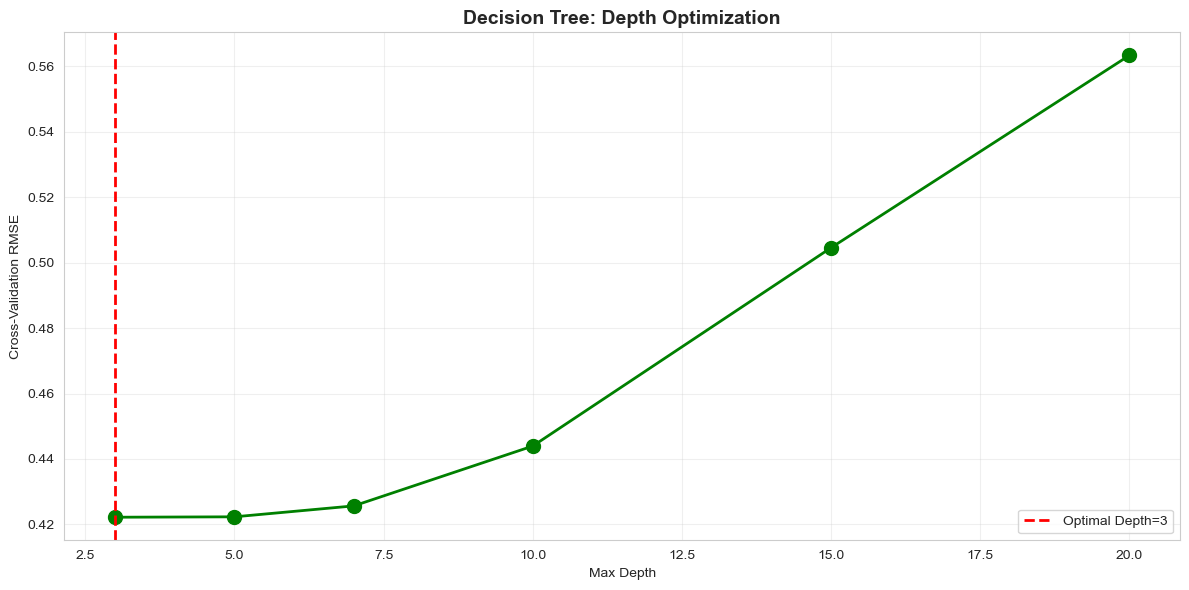

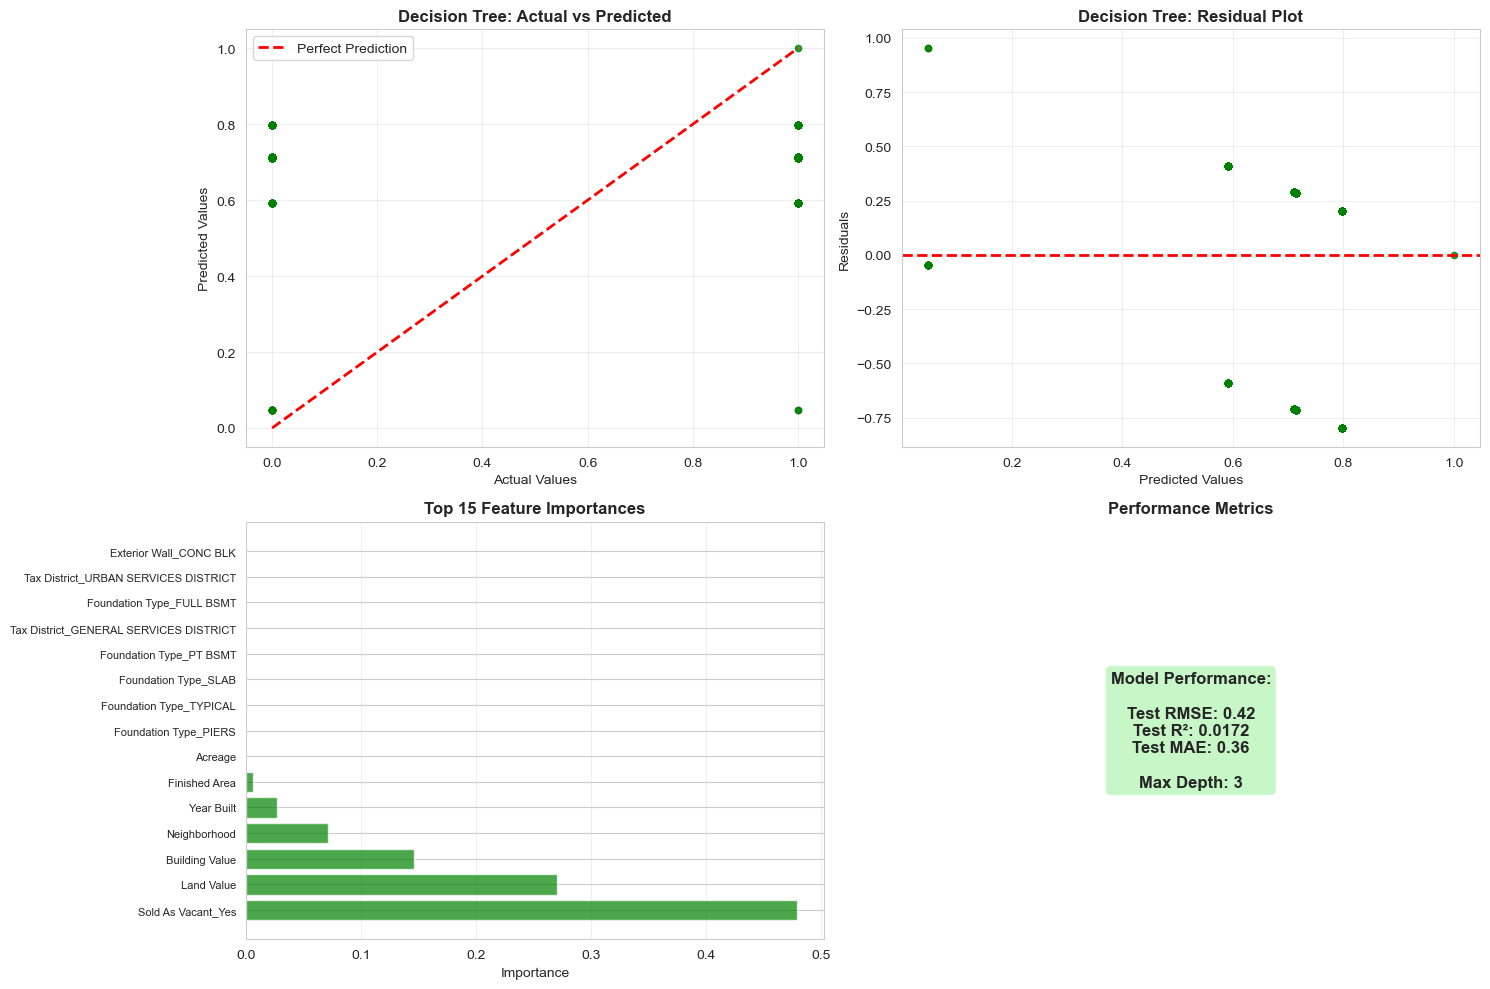

In [24]:
# ============================================================================
# PART 3: DECISION TREE MODEL
# ============================================================================

print("\n" + "="*80)
print("PART 3: DECISION TREE MODEL")
print("="*80)

# Test different max_depth values
depths = [3, 5, 7, 10, 15, 20]
dt_cv_scores = []

print("\nTesting different tree depths...")
for depth in depths:
    dt_temp = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_temp, X_train, y_train, cv=5, 
                            scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    dt_cv_scores.append(rmse_scores.mean())
    print(f"Depth={depth:2d}: CV RMSE = {rmse_scores.mean():,.2f}")

optimal_depth = depths[np.argmin(dt_cv_scores)]
print(f"\n✓ Optimal depth: {optimal_depth}")

# Train final model
dt = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
dt.fit(X_train, y_train)

# Predictions
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)

# Metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds))
dt_train_r2 = r2_score(y_train, dt_train_preds)
dt_test_r2 = r2_score(y_test, dt_test_preds)
dt_test_mae = mean_absolute_error(y_test, dt_test_preds)

print("\nDecision Tree Performance:")
print("-" * 60)
print(f"Training RMSE: {dt_train_rmse:,.2f}")
print(f"Test RMSE:     {dt_test_rmse:,.2f}")
print(f"Training R²:   {dt_train_r2:.4f}")
print(f"Test R²:       {dt_test_r2:.4f}")
print(f"Test MAE:      {dt_test_mae:,.2f}")

# Visualization 8: Decision Tree Depth Optimization
plt.figure(figsize=(12, 6))
plt.plot(depths, dt_cv_scores, marker='o', linewidth=2, markersize=10, color='green')
plt.axvline(x=optimal_depth, color='red', linestyle='--', linewidth=2,
            label=f'Optimal Depth={optimal_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation RMSE')
plt.title('Decision Tree: Depth Optimization', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('08_decision_tree_optimization.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 9: Decision Tree Results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Actual vs Predicted
axes[0, 0].scatter(y_test, dt_test_preds, alpha=0.5, s=20, color='green')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Decision Tree: Actual vs Predicted', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residual plot
dt_residuals = y_test - dt_test_preds
axes[0, 1].scatter(dt_test_preds, dt_residuals, alpha=0.5, s=20, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Decision Tree: Residual Plot', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

top_features_dt = feature_importance_dt.head(15)
axes[1, 0].barh(range(len(top_features_dt)), top_features_dt['Importance'], color='green', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_features_dt)))
axes[1, 0].set_yticklabels(top_features_dt['Feature'], fontsize=8)
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Top 15 Feature Importances', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Performance metrics
dt_metrics_text = f"Model Performance:\n\n"
dt_metrics_text += f"Test RMSE: {dt_test_rmse:,.2f}\n"
dt_metrics_text += f"Test R²: {dt_test_r2:.4f}\n"
dt_metrics_text += f"Test MAE: {dt_test_mae:,.2f}\n\n"
dt_metrics_text += f"Max Depth: {optimal_depth}"

axes[1, 1].text(0.5, 0.5, dt_metrics_text, ha='center', va='center',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
axes[1, 1].set_title('Performance Metrics', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('09_decision_tree_results.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()



PART 4: RANDOM FOREST MODEL

Testing different numbers of trees...
Trees= 50: CV RMSE = 0.46
Trees=100: CV RMSE = 0.46
Trees=200: CV RMSE = 0.45
Trees=300: CV RMSE = 0.45

✓ Optimal number of trees: 300

Random Forest Performance:
------------------------------------------------------------
Training RMSE: 0.21
Test RMSE:     0.47
Training R²:   0.7612
Test R²:       -0.1853
Test MAE:      0.38


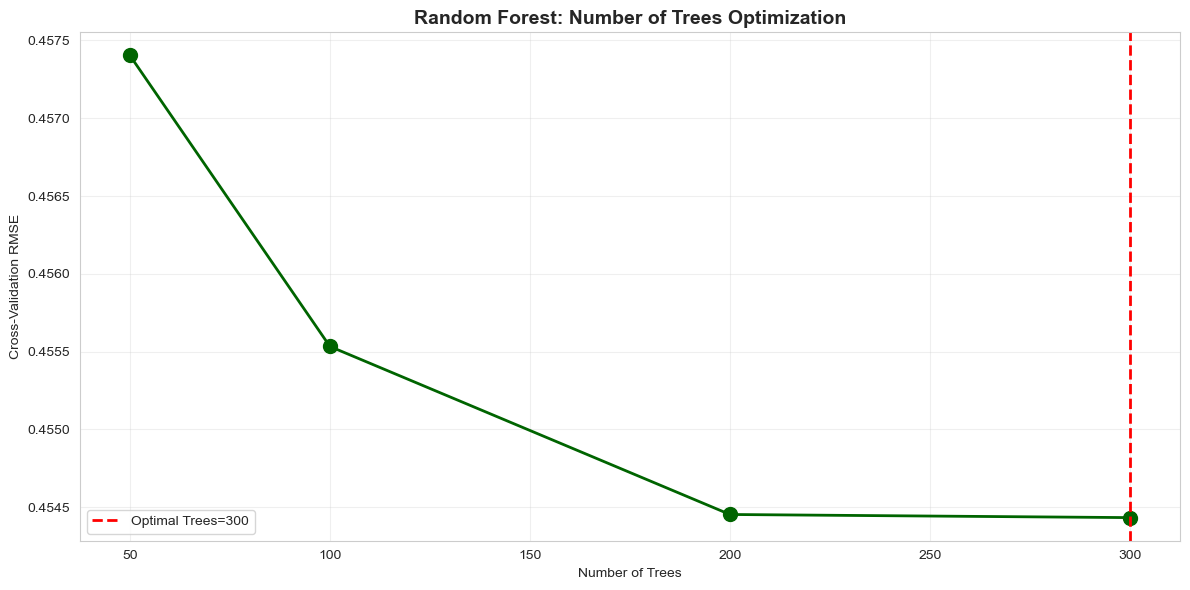

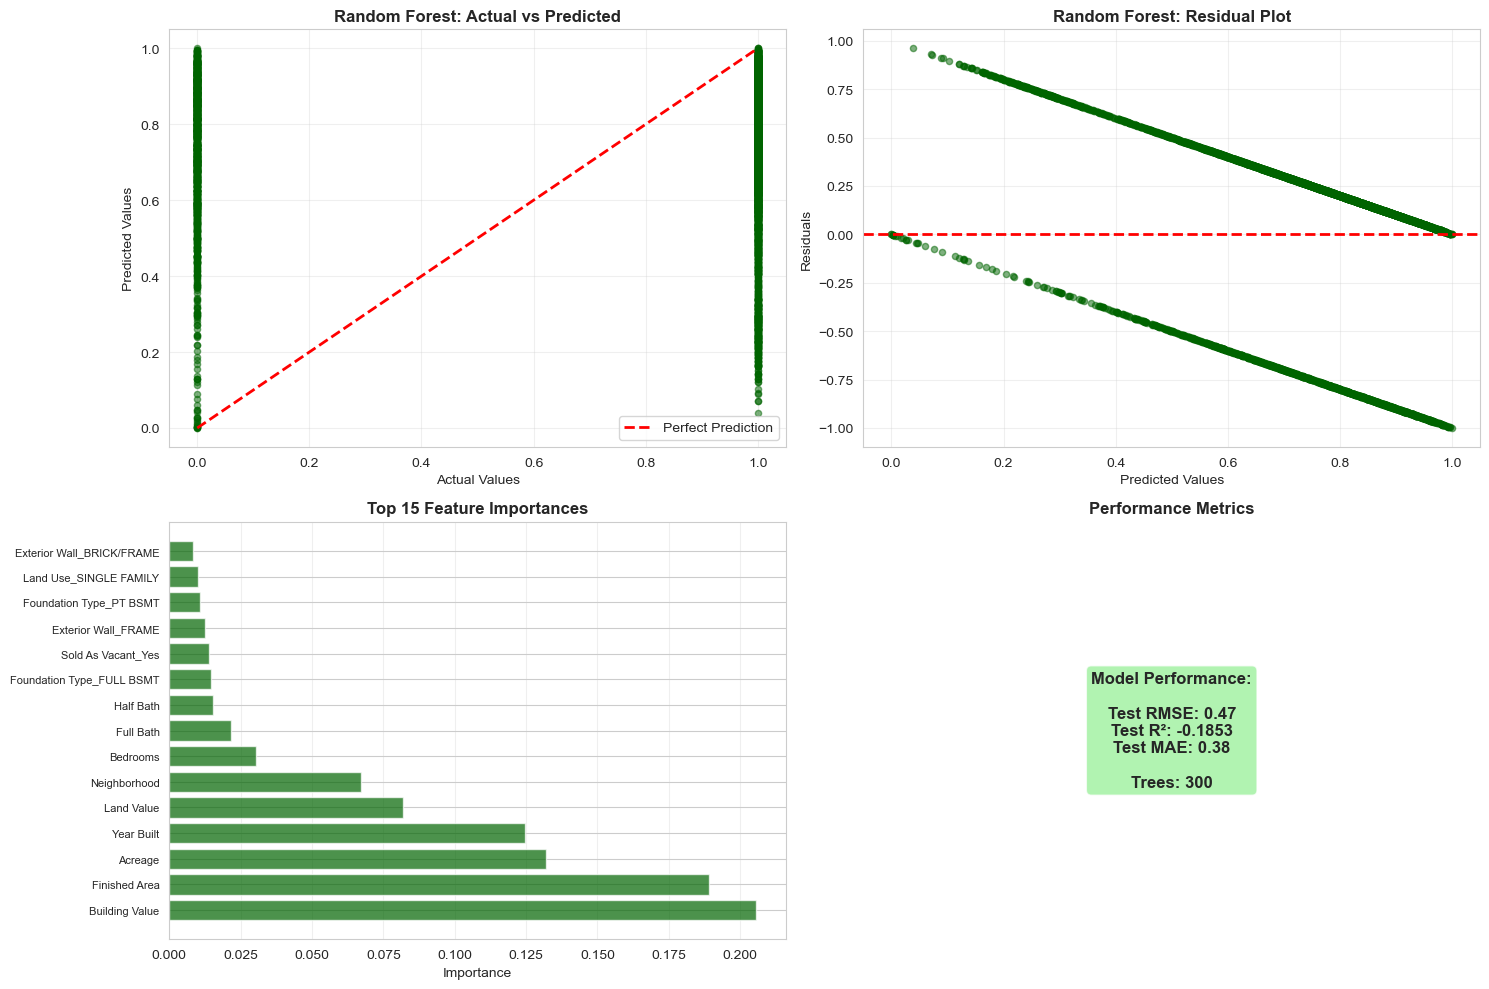

In [25]:
# ============================================================================
# PART 4: RANDOM FOREST MODEL
# ============================================================================

print("\n" + "="*80)
print("PART 4: RANDOM FOREST MODEL")
print("="*80)

# Test different n_estimators
estimators = [50, 100, 200, 300]
rf_cv_scores = []

print("\nTesting different numbers of trees...")
for n_est in estimators:
    rf_temp = RandomForestRegressor(n_estimators=n_est, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf_temp, X_train, y_train, cv=5,
                            scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rf_cv_scores.append(rmse_scores.mean())
    print(f"Trees={n_est:3d}: CV RMSE = {rmse_scores.mean():,.2f}")

optimal_estimators = estimators[np.argmin(rf_cv_scores)]
print(f"\n✓ Optimal number of trees: {optimal_estimators}")

# Train final model
rf = RandomForestRegressor(n_estimators=optimal_estimators, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# Metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

print("\nRandom Forest Performance:")
print("-" * 60)
print(f"Training RMSE: {rf_train_rmse:,.2f}")
print(f"Test RMSE:     {rf_test_rmse:,.2f}")
print(f"Training R²:   {rf_train_r2:.4f}")
print(f"Test R²:       {rf_test_r2:.4f}")
print(f"Test MAE:      {rf_test_mae:,.2f}")

# Visualization 10: Random Forest Optimization
plt.figure(figsize=(12, 6))
plt.plot(estimators, rf_cv_scores, marker='o', linewidth=2, markersize=10, color='darkgreen')
plt.axvline(x=optimal_estimators, color='red', linestyle='--', linewidth=2,
            label=f'Optimal Trees={optimal_estimators}')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation RMSE')
plt.title('Random Forest: Number of Trees Optimization', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('10_random_forest_optimization.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 11: Random Forest Results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Actual vs Predicted
axes[0, 0].scatter(y_test, rf_test_preds, alpha=0.5, s=20, color='darkgreen')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Random Forest: Actual vs Predicted', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residual plot
rf_residuals = y_test - rf_test_preds
axes[0, 1].scatter(rf_test_preds, rf_residuals, alpha=0.5, s=20, color='darkgreen')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Random Forest: Residual Plot', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

top_features_rf = feature_importance_rf.head(15)
axes[1, 0].barh(range(len(top_features_rf)), top_features_rf['Importance'], 
                color='darkgreen', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_features_rf)))
axes[1, 0].set_yticklabels(top_features_rf['Feature'], fontsize=8)
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Top 15 Feature Importances', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Performance metrics
rf_metrics_text = f"Model Performance:\n\n"
rf_metrics_text += f"Test RMSE: {rf_test_rmse:,.2f}\n"
rf_metrics_text += f"Test R²: {rf_test_r2:.4f}\n"
rf_metrics_text += f"Test MAE: {rf_test_mae:,.2f}\n\n"
rf_metrics_text += f"Trees: {optimal_estimators}"

axes[1, 1].text(0.5, 0.5, rf_metrics_text, ha='center', va='center',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[1, 1].set_title('Performance Metrics', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('11_random_forest_results.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()


PART 5: GRADIENT BOOSTING MODEL

Training Gradient Boosting model...

Gradient Boosting Performance:
------------------------------------------------------------
Training RMSE: 0.40
Test RMSE:     0.42
Training R²:   0.1139
Test R²:       0.0340
Test MAE:      0.35


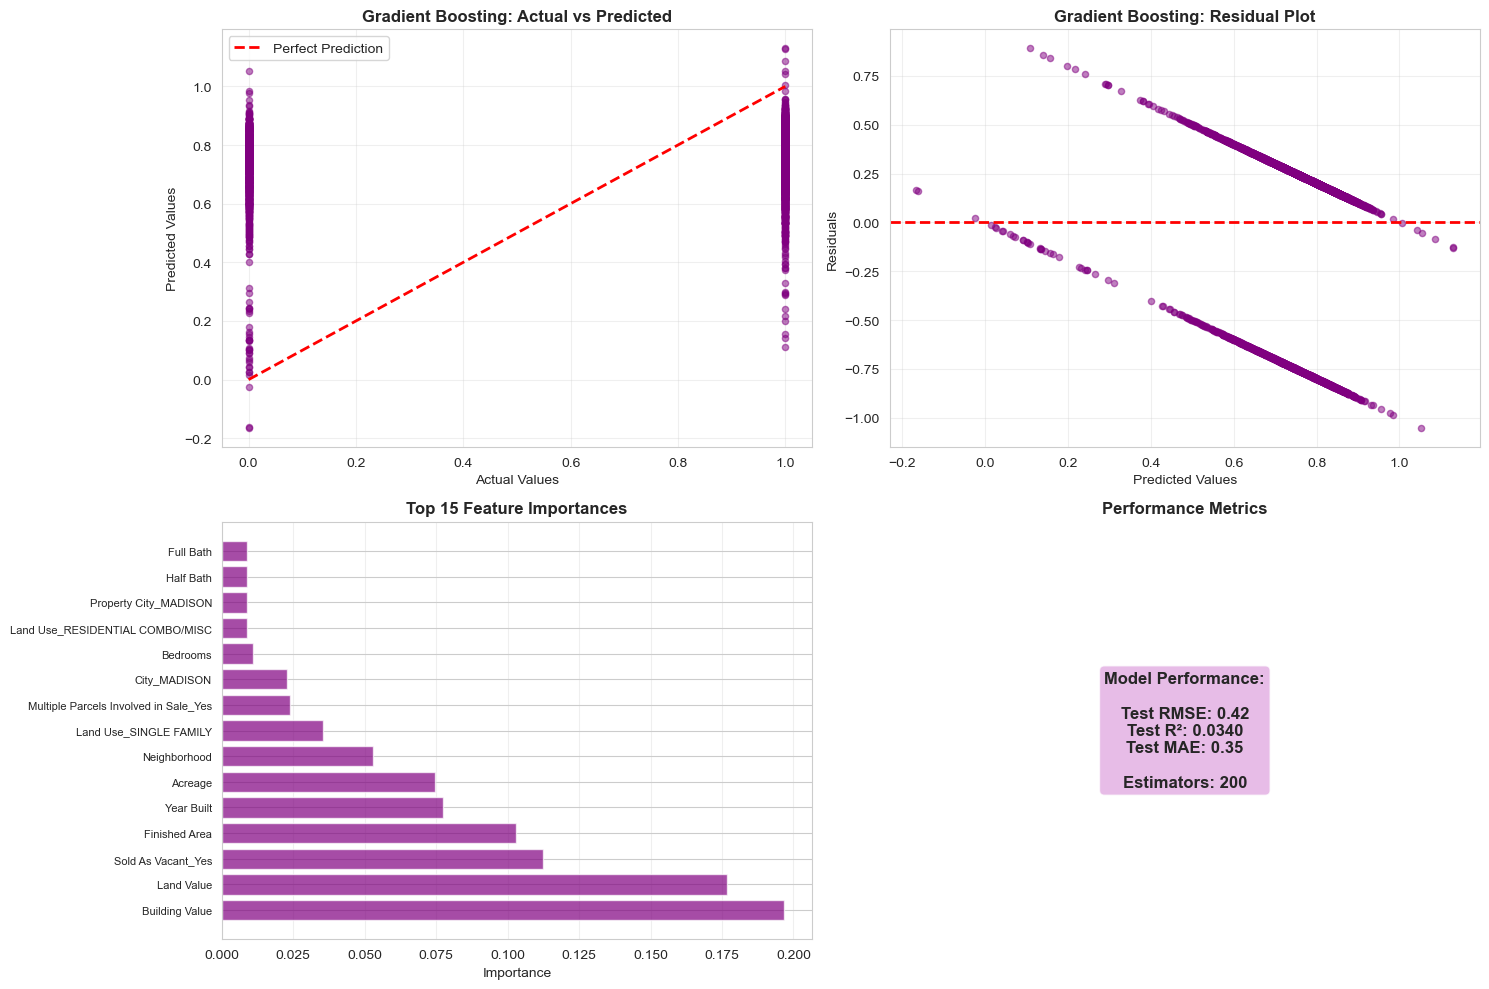

In [27]:
# ============================================================================
# PART 5: GRADIENT BOOSTING MODEL
# ============================================================================

print("\n" + "="*80)
print("PART 5: GRADIENT BOOSTING MODEL")
print("="*80)

# Train model
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
print("\nTraining Gradient Boosting model...")
gb.fit(X_train, y_train)

# Predictions
gb_train_preds = gb.predict(X_train)
gb_test_preds = gb.predict(X_test)

# Metrics
gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_train_preds))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_preds))
gb_train_r2 = r2_score(y_train, gb_train_preds)
gb_test_r2 = r2_score(y_test, gb_test_preds)
gb_test_mae = mean_absolute_error(y_test, gb_test_preds)

print("\nGradient Boosting Performance:")
print("-" * 60)
print(f"Training RMSE: {gb_train_rmse:,.2f}")
print(f"Test RMSE:     {gb_test_rmse:,.2f}")
print(f"Training R²:   {gb_train_r2:.4f}")
print(f"Test R²:       {gb_test_r2:.4f}")
print(f"Test MAE:      {gb_test_mae:,.2f}")

# Visualization 12: Gradient Boosting Results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Actual vs Predicted
axes[0, 0].scatter(y_test, gb_test_preds, alpha=0.5, s=20, color='purple')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Gradient Boosting: Actual vs Predicted', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residual plot
gb_residuals = y_test - gb_test_preds
axes[0, 1].scatter(gb_test_preds, gb_residuals, alpha=0.5, s=20, color='purple')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Gradient Boosting: Residual Plot', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False)

top_features_gb = feature_importance_gb.head(15)
axes[1, 0].barh(range(len(top_features_gb)), top_features_gb['Importance'],
                color='purple', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_features_gb)))
axes[1, 0].set_yticklabels(top_features_gb['Feature'], fontsize=8)
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Top 15 Feature Importances', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Performance metrics
gb_metrics_text = f"Model Performance:\n\n"
gb_metrics_text += f"Test RMSE: {gb_test_rmse:,.2f}\n"
gb_metrics_text += f"Test R²: {gb_test_r2:.4f}\n"
gb_metrics_text += f"Test MAE: {gb_test_mae:,.2f}\n\n"
gb_metrics_text += f"Estimators: 200"

axes[1, 1].text(0.5, 0.5, gb_metrics_text, ha='center', va='center',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='plum', alpha=0.7))
axes[1, 1].set_title('Performance Metrics', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('12_gradient_boosting_results.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()



PART 6: COMPREHENSIVE MODEL COMPARISON

MODEL PERFORMANCE COMPARISON:
            Model  Train_RMSE  Test_RMSE  Train_R2   Test_R2  Test_MAE  Overfitting
Linear Regression    0.419057   0.422142  0.037397  0.027797  0.353451    -0.003085
    Decision Tree    0.421360   0.424440  0.026788  0.017182  0.357825    -0.003080
    Random Forest    0.208716   0.466120  0.761212 -0.185321  0.375451    -0.257404
Gradient Boosting    0.402050   0.420800  0.113943  0.033968  0.350001    -0.018750


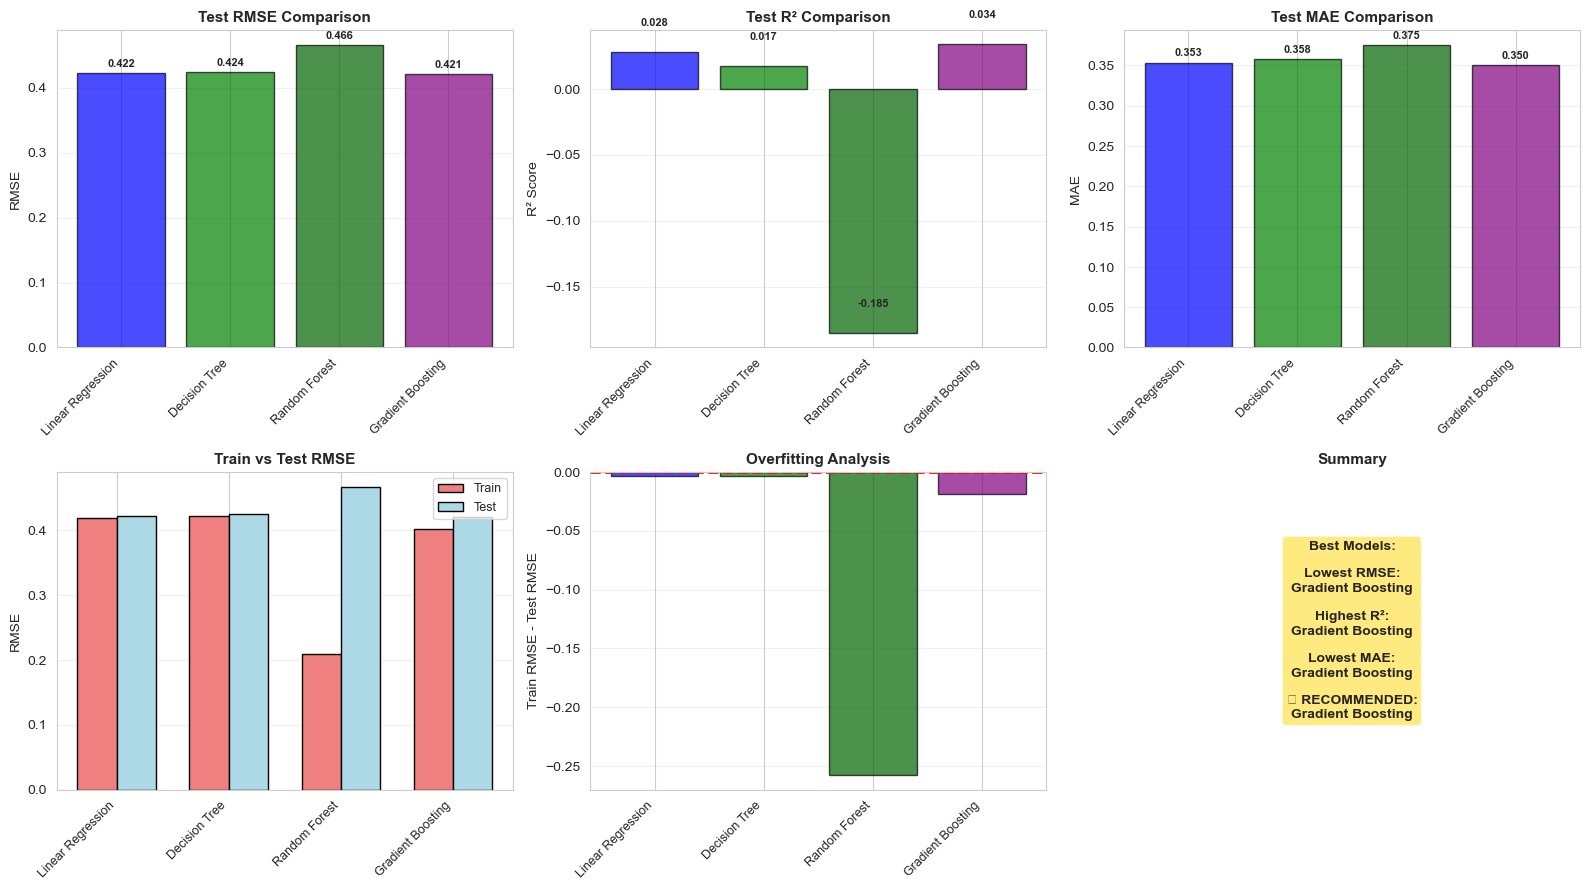

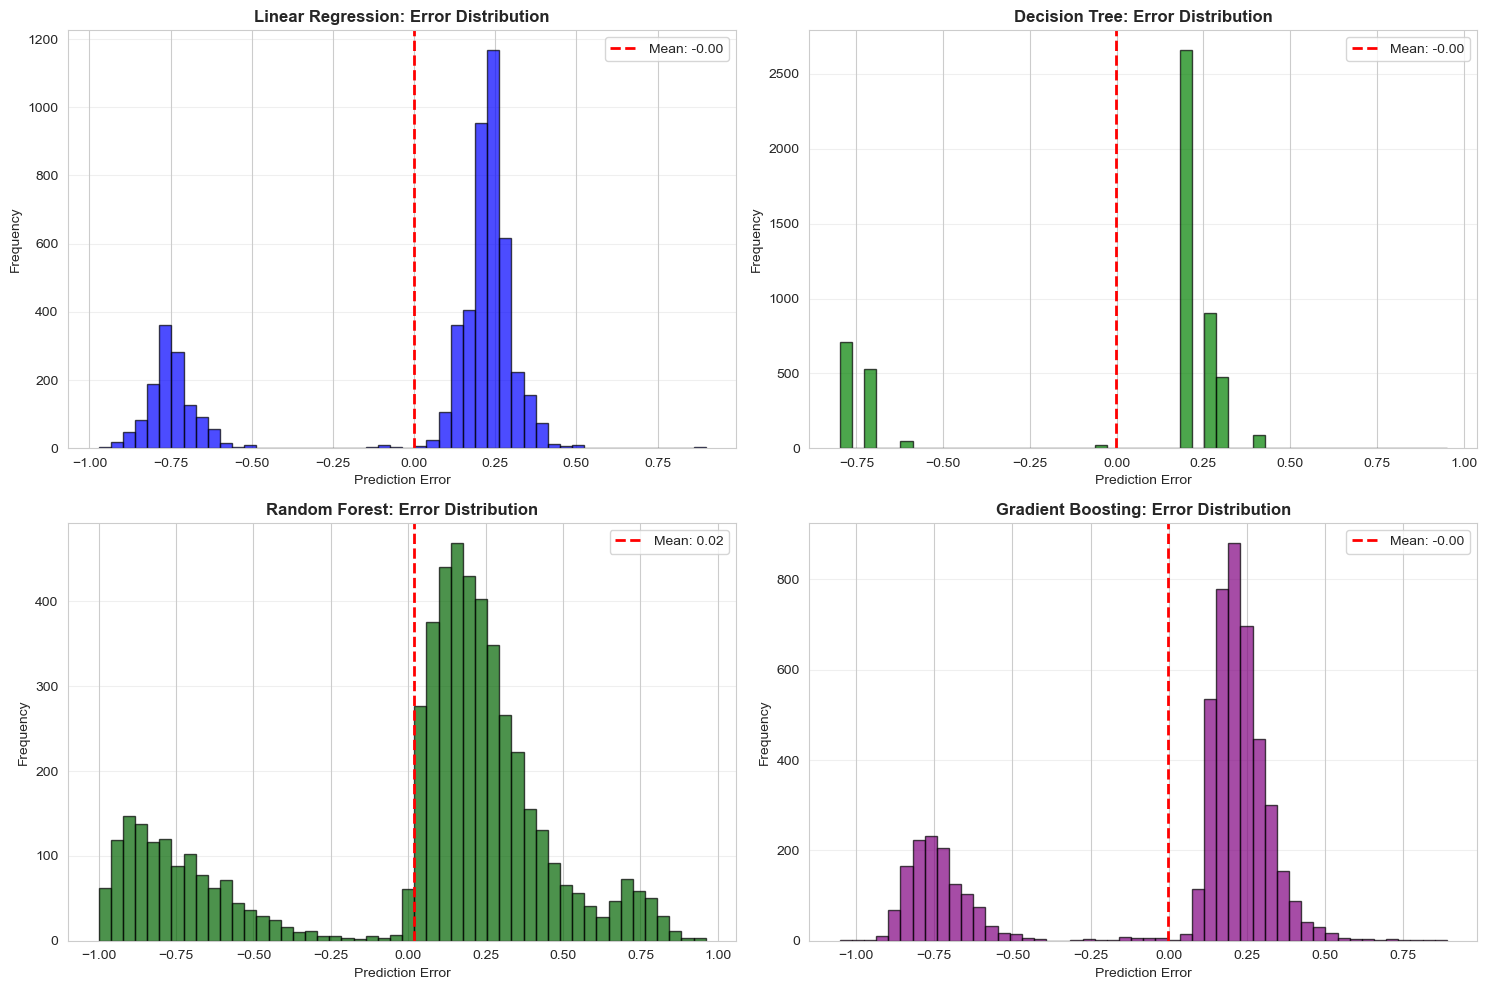

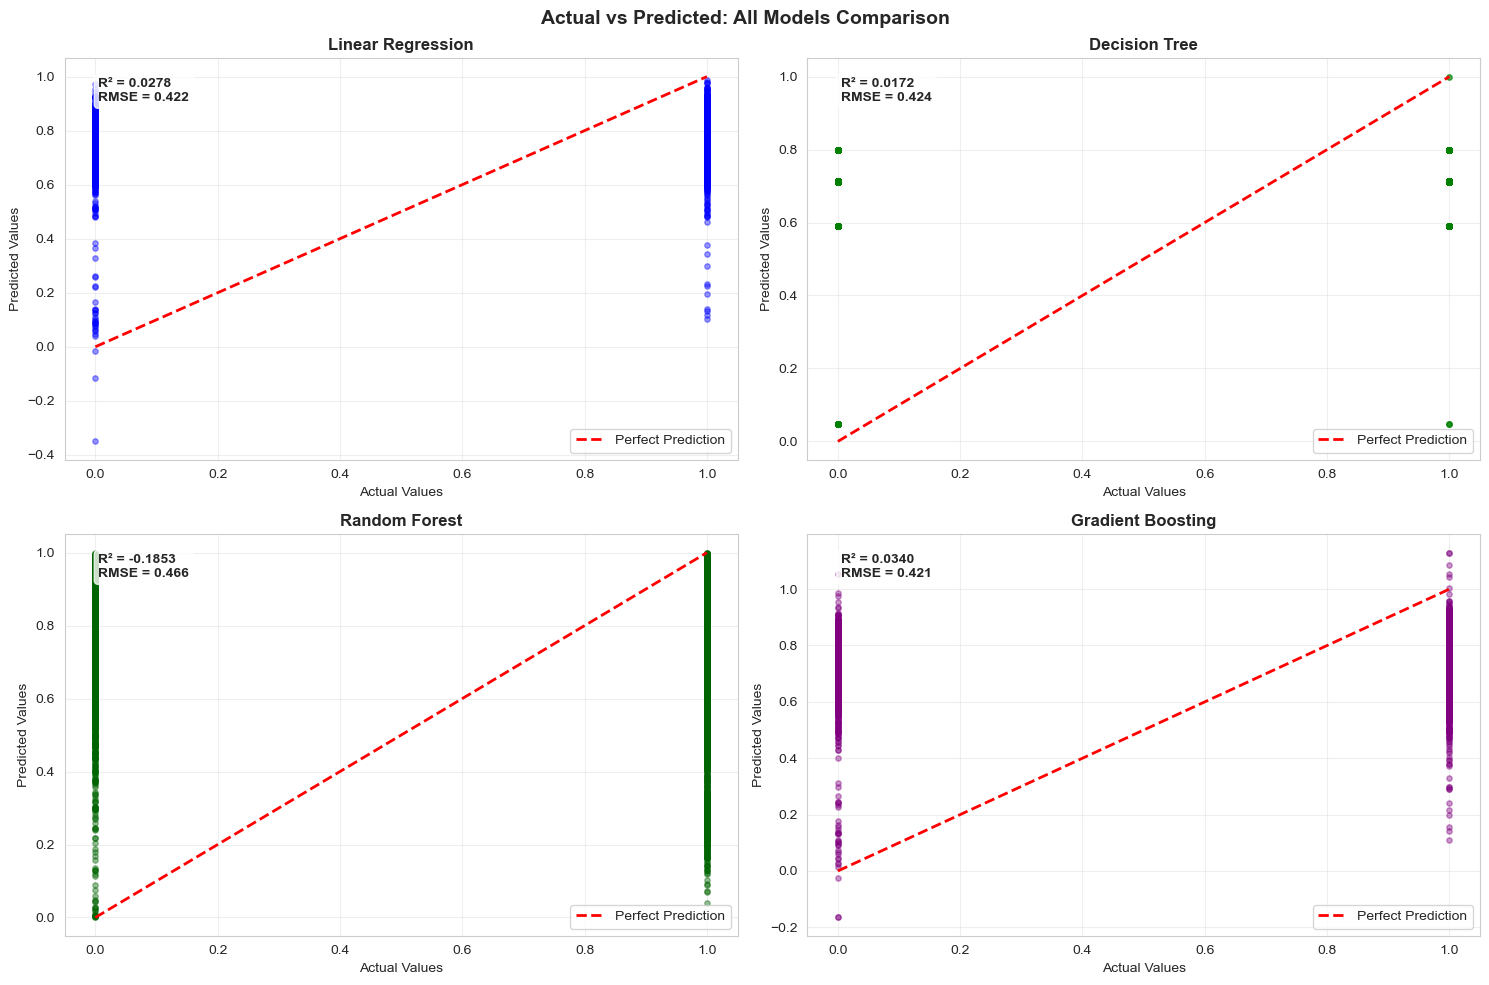

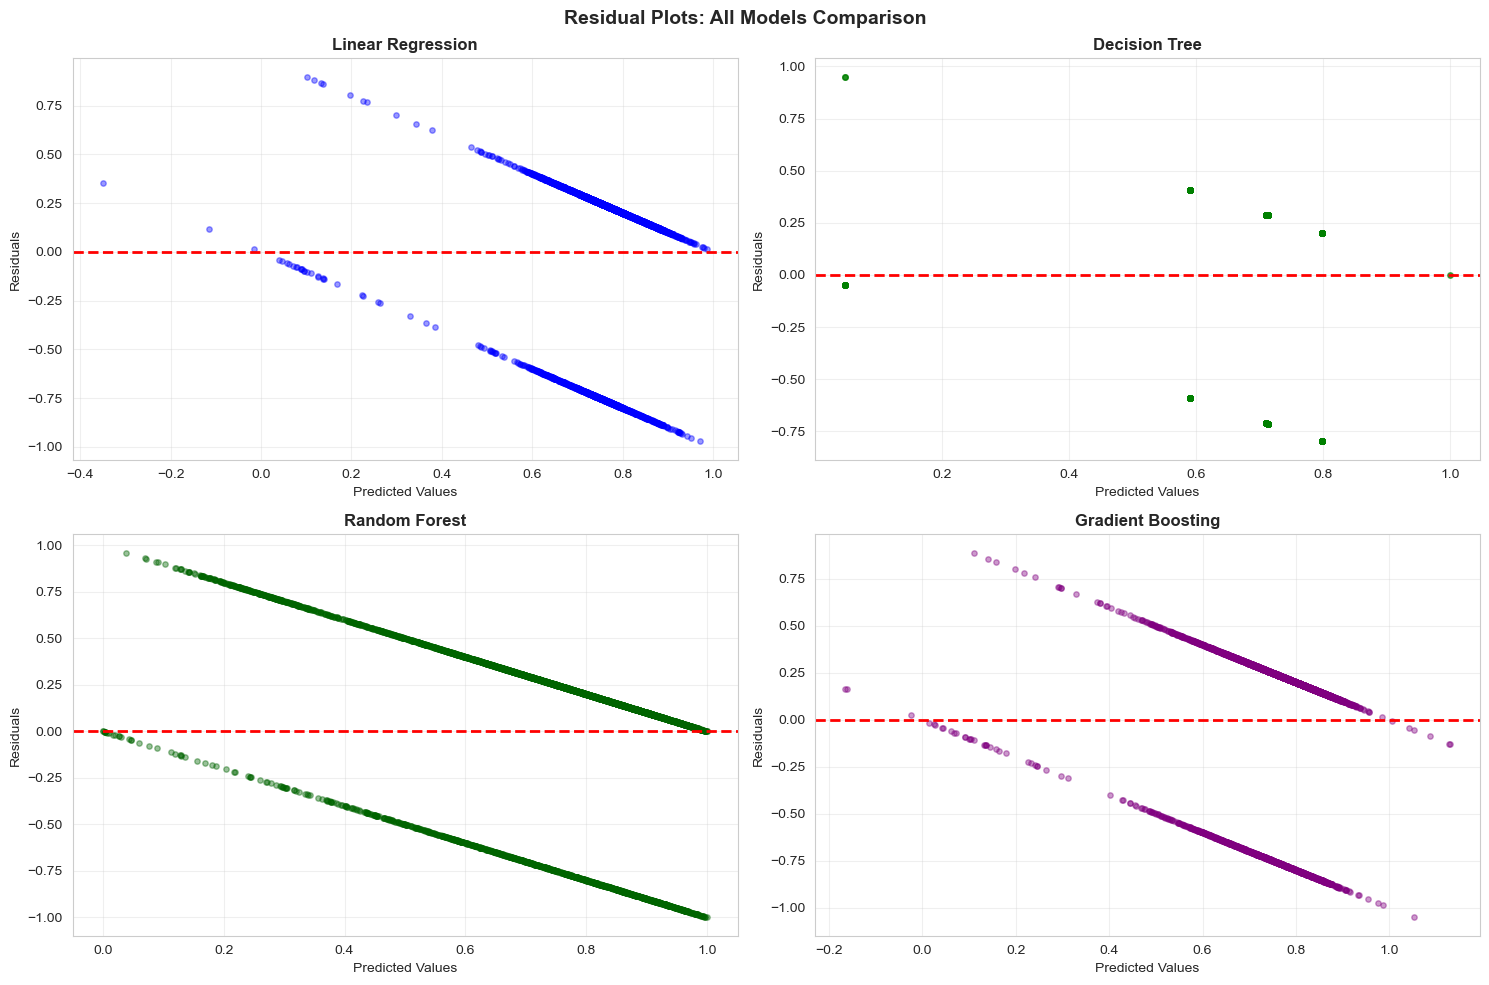

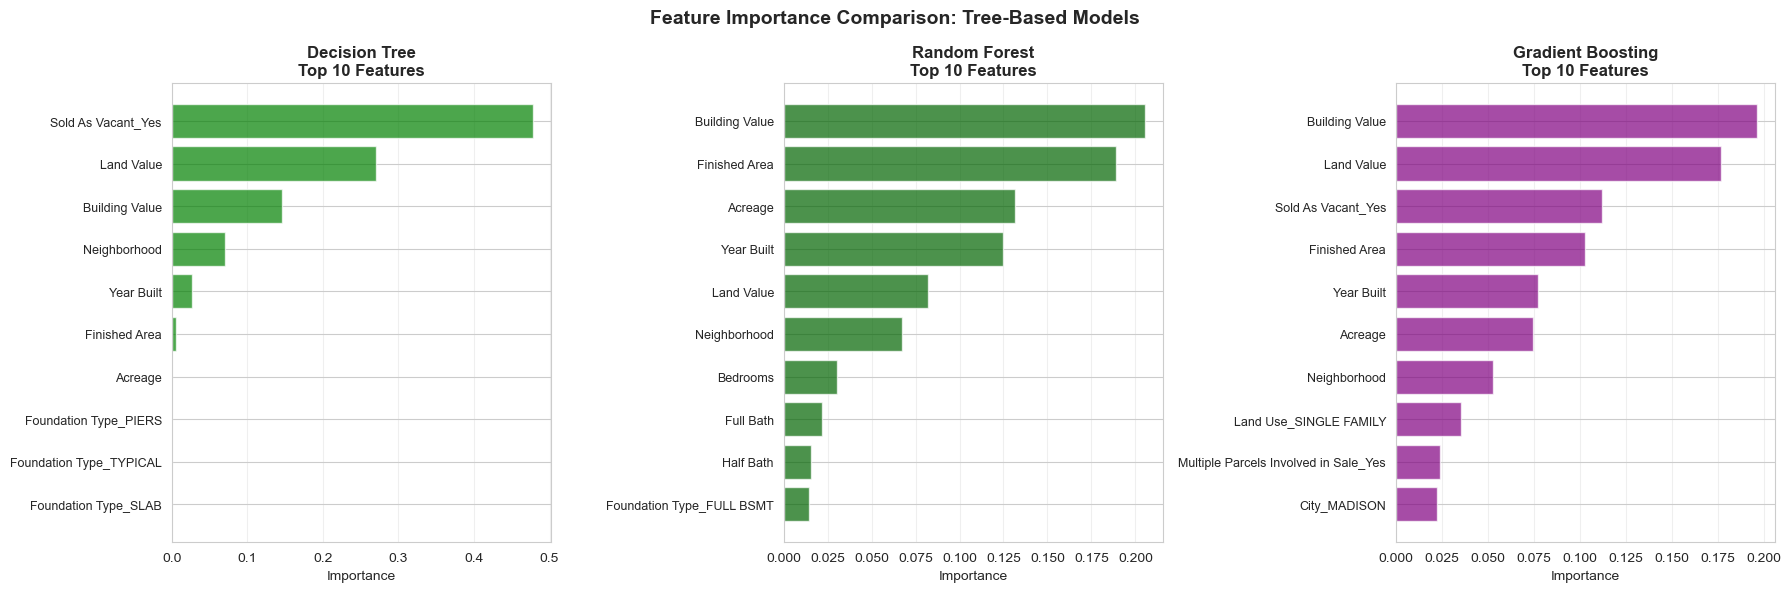

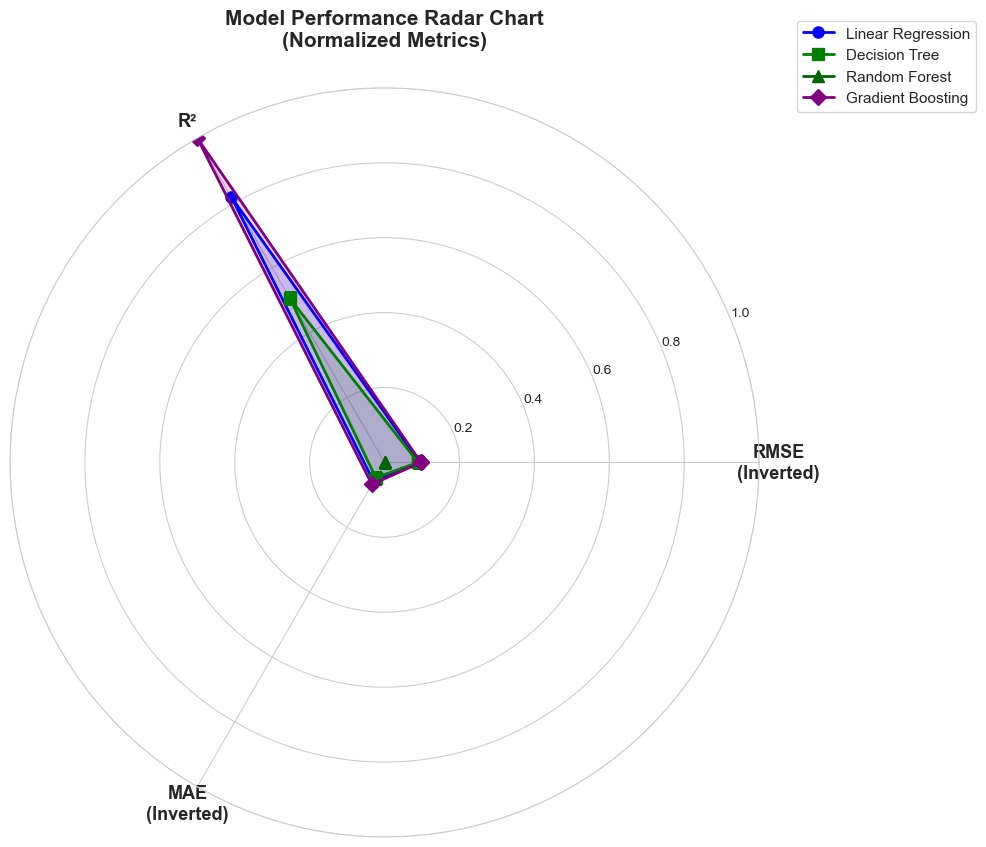

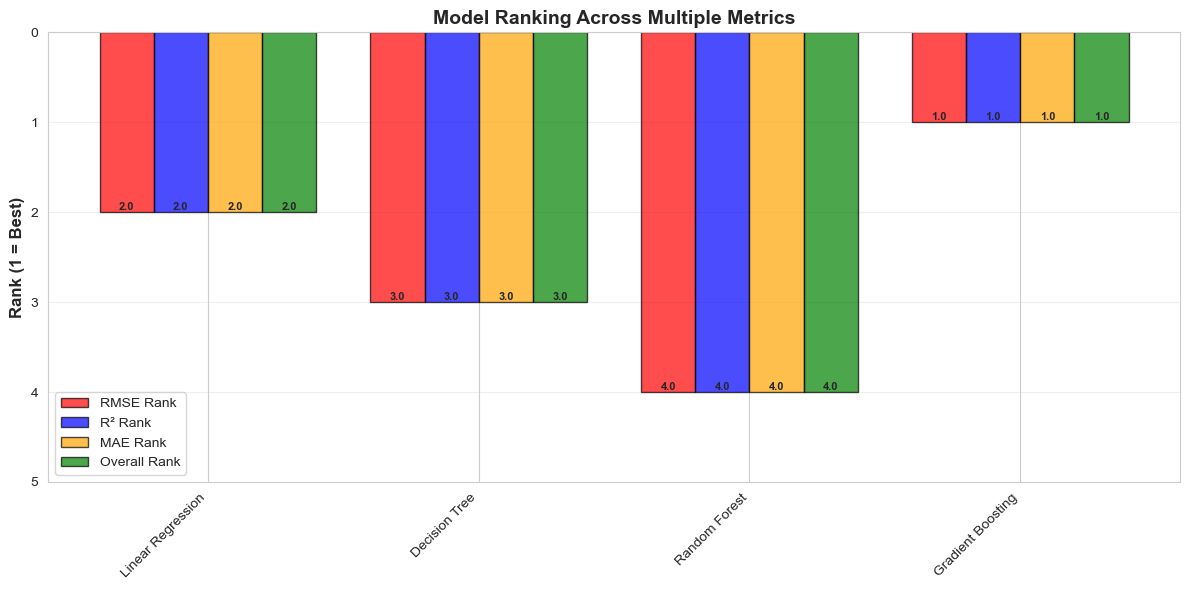

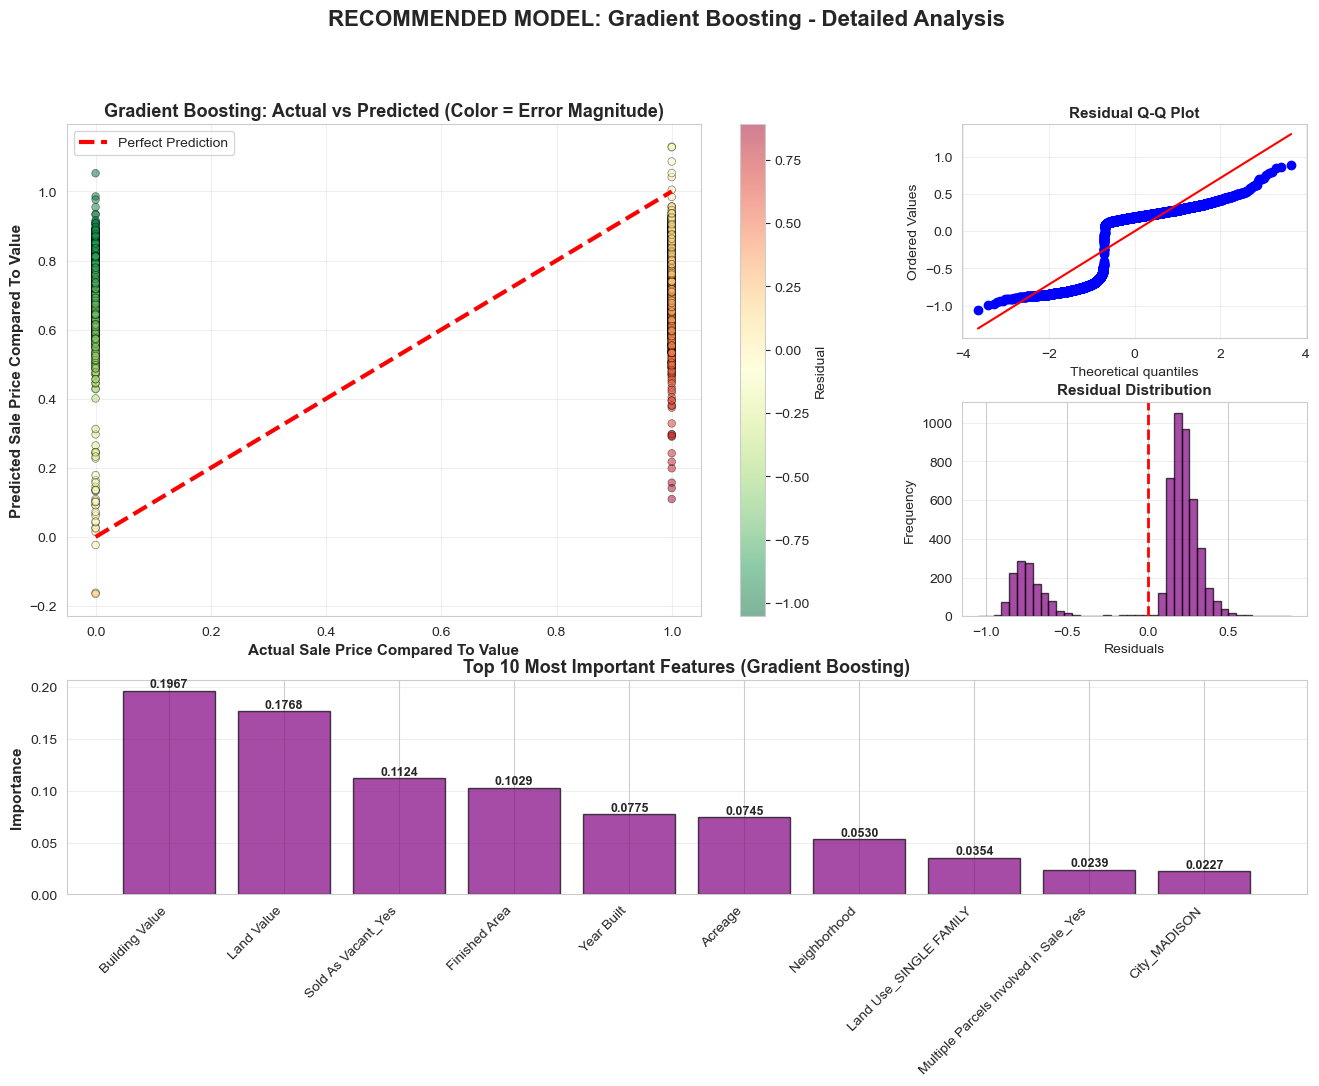


✓ Results saved to 'model_comparison_results.csv'
✓ Feature importances saved for all tree-based models

ANALYSIS COMPLETE!

Generated Visualizations:
  1. Data Quality Dashboard
  2. Outlier Analysis
  3. Target Distribution
  4. Correlation Analysis
  5. Correlation Heatmap
  6. Train/Test Split
  7. Linear Regression Results
  8. Decision Tree Optimization
  9. Decision Tree Results
 10. Random Forest Optimization
 11. Random Forest Results
 12. Gradient Boosting Results
 13. Comprehensive Comparison
 14. Error Distributions
 15. All Models Predictions Comparison
 16. All Models Residuals Comparison
 17. Feature Importance Comparison
 18. Performance Radar Chart
 19. Model Ranking Summary
 20. Best Model Deep Dive

✓ 20 visualizations saved (150-200 DPI)
✓ Ready for APA paper integration


In [30]:
# ============================================================================
# PART 6: COMPREHENSIVE MODEL COMPARISON
# ============================================================================

print("\n" + "="*80)
print("PART 6: COMPREHENSIVE MODEL COMPARISON")
print("="*80)

# Create comprehensive comparison
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Train_RMSE': [lr_train_rmse, dt_train_rmse, rf_train_rmse, gb_train_rmse],
    'Test_RMSE': [lr_test_rmse, dt_test_rmse, rf_test_rmse, gb_test_rmse],
    'Train_R2': [lr_train_r2, dt_train_r2, rf_train_r2, gb_train_r2],
    'Test_R2': [lr_test_r2, dt_test_r2, rf_test_r2, gb_test_r2],
    'Test_MAE': [lr_test_mae, dt_test_mae, rf_test_mae, gb_test_mae],
    'Overfitting': [lr_train_rmse - lr_test_rmse, 
                   dt_train_rmse - dt_test_rmse,
                   rf_train_rmse - rf_test_rmse,
                   gb_train_rmse - gb_test_rmse]
})

print("\nMODEL PERFORMANCE COMPARISON:")
print("="*80)
print(results_df.to_string(index=False))

# Visualization 13: Comprehensive Model Comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

models = results_df['Model']
colors = ['blue', 'green', 'darkgreen', 'purple']

# Test RMSE
axes[0, 0].bar(models, results_df['Test_RMSE'], color=colors, edgecolor='black', alpha=0.7)
axes[0, 0].set_ylabel('RMSE', fontsize=10)
axes[0, 0].set_title('Test RMSE Comparison', fontweight='bold', fontsize=11)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_df['Test_RMSE']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold', fontsize=8)

# Test R²
axes[0, 1].bar(models, results_df['Test_R2'], color=colors, edgecolor='black', alpha=0.7)
axes[0, 1].set_ylabel('R² Score', fontsize=10)
axes[0, 1].set_title('Test R² Comparison', fontweight='bold', fontsize=11)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_df['Test_R2']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold', fontsize=8)

# Test MAE
axes[0, 2].bar(models, results_df['Test_MAE'], color=colors, edgecolor='black', alpha=0.7)
axes[0, 2].set_ylabel('MAE', fontsize=10)
axes[0, 2].set_title('Test MAE Comparison', fontweight='bold', fontsize=11)
axes[0, 2].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[0, 2].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_df['Test_MAE']):
    axes[0, 2].text(i, v + 0.008, f'{v:.3f}', ha='center', fontweight='bold', fontsize=8)

# Train vs Test RMSE
x = np.arange(len(models))
width = 0.35
axes[1, 0].bar(x - width/2, results_df['Train_RMSE'], width, label='Train', 
               color='lightcoral', edgecolor='black')
axes[1, 0].bar(x + width/2, results_df['Test_RMSE'], width, label='Test',
               color='lightblue', edgecolor='black')
axes[1, 0].set_ylabel('RMSE', fontsize=10)
axes[1, 0].set_title('Train vs Test RMSE', fontweight='bold', fontsize=11)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(axis='y', alpha=0.3)

# Overfitting analysis
axes[1, 1].bar(models, results_df['Overfitting'], color=colors, edgecolor='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_ylabel('Train RMSE - Test RMSE', fontsize=10)
axes[1, 1].set_title('Overfitting Analysis', fontweight='bold', fontsize=11)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3)

# Best model summary
best_rmse = results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']
best_r2 = results_df.loc[results_df['Test_R2'].idxmax(), 'Model']
best_mae = results_df.loc[results_df['Test_MAE'].idxmin(), 'Model']

summary_text = f"Best Models:\n\n"
summary_text += f"Lowest RMSE:\n{best_rmse}\n\n"
summary_text += f"Highest R²:\n{best_r2}\n\n"
summary_text += f"Lowest MAE:\n{best_mae}\n\n"

if best_rmse == best_r2 == best_mae:
    summary_text += f"★ RECOMMENDED:\n{best_rmse}"
else:
    summary_text += "Multiple top\nperformers"

axes[1, 2].text(0.5, 0.5, summary_text, ha='center', va='center',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='gold', alpha=0.5))
axes[1, 2].set_title('Summary', fontweight='bold', fontsize=11)
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('13_comprehensive_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 14: Prediction Error Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

all_predictions = [
    (lr_test_preds, 'Linear Regression', 'blue'),
    (dt_test_preds, 'Decision Tree', 'green'),
    (rf_test_preds, 'Random Forest', 'darkgreen'),
    (gb_test_preds, 'Gradient Boosting', 'purple')
]

for idx, (preds, name, color) in enumerate(all_predictions):
    errors = y_test - preds
    axes[idx//2, idx%2].hist(errors, bins=50, color=color, edgecolor='black', alpha=0.7)
    axes[idx//2, idx%2].axvline(errors.mean(), color='red', linestyle='--',
                                linewidth=2, label=f'Mean: {errors.mean():.2f}')
    axes[idx//2, idx%2].set_xlabel('Prediction Error')
    axes[idx//2, idx%2].set_ylabel('Frequency')
    axes[idx//2, idx%2].set_title(f'{name}: Error Distribution', fontweight='bold')
    axes[idx//2, idx%2].legend()
    axes[idx//2, idx%2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('14_error_distributions.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 15: Actual vs Predicted - All Models Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

all_models_pred = [
    (lr_test_preds, 'Linear Regression', 'blue'),
    (dt_test_preds, 'Decision Tree', 'green'),
    (rf_test_preds, 'Random Forest', 'darkgreen'),
    (gb_test_preds, 'Gradient Boosting', 'purple')
]

for idx, (preds, name, color) in enumerate(all_models_pred):
    axes[idx//2, idx%2].scatter(y_test, preds, alpha=0.4, s=15, color=color)
    axes[idx//2, idx%2].plot([y_test.min(), y_test.max()], 
                              [y_test.min(), y_test.max()],
                              'r--', lw=2, label='Perfect Prediction')
    
    # Calculate R² for annotation
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    axes[idx//2, idx%2].text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.3f}',
                             transform=axes[idx//2, idx%2].transAxes,
                             fontsize=10, fontweight='bold', va='top',
                             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    axes[idx//2, idx%2].set_xlabel('Actual Values')
    axes[idx//2, idx%2].set_ylabel('Predicted Values')
    axes[idx//2, idx%2].set_title(f'{name}', fontweight='bold')
    axes[idx//2, idx%2].legend(loc='lower right')
    axes[idx//2, idx%2].grid(alpha=0.3)

plt.suptitle('Actual vs Predicted: All Models Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('15_all_models_predictions.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 16: Residual Comparison - All Models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

all_residuals = [
    (y_test - lr_test_preds, lr_test_preds, 'Linear Regression', 'blue'),
    (y_test - dt_test_preds, dt_test_preds, 'Decision Tree', 'green'),
    (y_test - rf_test_preds, rf_test_preds, 'Random Forest', 'darkgreen'),
    (y_test - gb_test_preds, gb_test_preds, 'Gradient Boosting', 'purple')
]

for idx, (resid, preds, name, color) in enumerate(all_residuals):
    axes[idx//2, idx%2].scatter(preds, resid, alpha=0.4, s=15, color=color)
    axes[idx//2, idx%2].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx//2, idx%2].set_xlabel('Predicted Values')
    axes[idx//2, idx%2].set_ylabel('Residuals')
    axes[idx//2, idx%2].set_title(f'{name}', fontweight='bold')
    axes[idx//2, idx%2].grid(alpha=0.3)

plt.suptitle('Residual Plots: All Models Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('16_all_models_residuals.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 17: Feature Importance Comparison (Tree-based Models)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Decision Tree
top_dt = feature_importance_dt.head(10)
axes[0].barh(range(len(top_dt)), top_dt['Importance'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_dt)))
axes[0].set_yticklabels(top_dt['Feature'], fontsize=9)
axes[0].set_xlabel('Importance', fontsize=10)
axes[0].set_title('Decision Tree\nTop 10 Features', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Random Forest
top_rf = feature_importance_rf.head(10)
axes[1].barh(range(len(top_rf)), top_rf['Importance'], color='darkgreen', alpha=0.7)
axes[1].set_yticks(range(len(top_rf)))
axes[1].set_yticklabels(top_rf['Feature'], fontsize=9)
axes[1].set_xlabel('Importance', fontsize=10)
axes[1].set_title('Random Forest\nTop 10 Features', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Gradient Boosting
top_gb = feature_importance_gb.head(10)
axes[2].barh(range(len(top_gb)), top_gb['Importance'], color='purple', alpha=0.7)
axes[2].set_yticks(range(len(top_gb)))
axes[2].set_yticklabels(top_gb['Feature'], fontsize=9)
axes[2].set_xlabel('Importance', fontsize=10)
axes[2].set_title('Gradient Boosting\nTop 10 Features', fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance Comparison: Tree-Based Models', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('17_feature_importance_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 18: Model Performance Radar Chart
from math import pi

categories = ['RMSE\n(Inverted)', 'R²', 'MAE\n(Inverted)']

# Normalize metrics for radar chart (higher is better for all)
# Invert RMSE and MAE so lower values become higher scores
max_rmse = max(results_df['Test_RMSE'])
max_mae = max(results_df['Test_MAE'])
max_r2 = max(results_df['Test_R2']) if max(results_df['Test_R2']) > 0 else 0.1

lr_radar = [(max_rmse - lr_test_rmse) / max_rmse, 
            lr_test_r2 / max_r2 if max_r2 > 0 else 0,
            (max_mae - lr_test_mae) / max_mae]
dt_radar = [(max_rmse - dt_test_rmse) / max_rmse,
            dt_test_r2 / max_r2 if max_r2 > 0 else 0,
            (max_mae - dt_test_mae) / max_mae]
rf_radar = [(max_rmse - rf_test_rmse) / max_rmse,
            rf_test_r2 / max_r2 if max_r2 > 0 else 0,
            (max_mae - rf_test_mae) / max_mae]
gb_radar = [(max_rmse - gb_test_rmse) / max_rmse,
            gb_test_r2 / max_r2 if max_r2 > 0 else 0,
            (max_mae - gb_test_mae) / max_mae]

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]

# Close the plot
lr_radar += lr_radar[:1]
dt_radar += dt_radar[:1]
rf_radar += rf_radar[:1]
gb_radar += gb_radar[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

ax.plot(angles, lr_radar, 'o-', linewidth=2, label='Linear Regression', color='blue', markersize=8)
ax.fill(angles, lr_radar, alpha=0.15, color='blue')

ax.plot(angles, dt_radar, 's-', linewidth=2, label='Decision Tree', color='green', markersize=8)
ax.fill(angles, dt_radar, alpha=0.15, color='green')

ax.plot(angles, rf_radar, '^-', linewidth=2, label='Random Forest', color='darkgreen', markersize=8)
ax.fill(angles, rf_radar, alpha=0.15, color='darkgreen')

ax.plot(angles, gb_radar, 'D-', linewidth=2, label='Gradient Boosting', color='purple', markersize=8)
ax.fill(angles, gb_radar, alpha=0.15, color='purple')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=13, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Model Performance Radar Chart\n(Normalized Metrics)', 
             fontsize=15, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.grid(True)

plt.tight_layout()
plt.savefig('18_performance_radar.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 19: Model Ranking Summary
fig, ax = plt.subplots(figsize=(12, 6))

# Rank models by each metric
rmse_ranks = results_df['Test_RMSE'].rank()
r2_ranks = results_df['Test_R2'].rank(ascending=False)
mae_ranks = results_df['Test_MAE'].rank()

# Overall ranking (lower is better)
results_df['Overall_Rank'] = (rmse_ranks + r2_ranks + mae_ranks) / 3

x = np.arange(len(models))
width = 0.2

bars1 = ax.bar(x - 1.5*width, rmse_ranks, width, label='RMSE Rank', 
               color='red', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x - 0.5*width, r2_ranks, width, label='R² Rank',
               color='blue', alpha=0.7, edgecolor='black')
bars3 = ax.bar(x + 0.5*width, mae_ranks, width, label='MAE Rank',
               color='orange', alpha=0.7, edgecolor='black')
bars4 = ax.bar(x + 1.5*width, results_df['Overall_Rank'], width, 
               label='Overall Rank', color='green', alpha=0.7, edgecolor='black')

ax.set_ylabel('Rank (1 = Best)', fontsize=12, fontweight='bold')
ax.set_title('Model Ranking Across Multiple Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 5)
ax.invert_yaxis()

# Add rank values on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('19_model_ranking.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Visualization 20: Best Model Deep Dive (Gradient Boosting)
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Large actual vs predicted
ax1 = fig.add_subplot(gs[0:2, 0:2])
scatter = ax1.scatter(y_test, gb_test_preds, alpha=0.5, s=30, c=gb_residuals, 
                      cmap='RdYlGn_r', edgecolor='black', linewidth=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=3, label='Perfect Prediction')
ax1.set_xlabel('Actual Sale Price Compared To Value', fontsize=11, fontweight='bold')
ax1.set_ylabel('Predicted Sale Price Compared To Value', fontsize=11, fontweight='bold')
ax1.set_title('Gradient Boosting: Actual vs Predicted (Color = Error Magnitude)',
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Residual')

# Residual Q-Q plot
ax2 = fig.add_subplot(gs[0, 2])
stats.probplot(gb_residuals, dist="norm", plot=ax2)
ax2.set_title('Residual Q-Q Plot', fontweight='bold', fontsize=11)
ax2.grid(alpha=0.3)

# Residual histogram
ax3 = fig.add_subplot(gs[1, 2])
ax3.hist(gb_residuals, bins=40, color='purple', edgecolor='black', alpha=0.7)
ax3.axvline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Frequency')
ax3.set_title('Residual Distribution', fontweight='bold', fontsize=11)
ax3.grid(axis='y', alpha=0.3)

# Top 10 Feature Importances
ax4 = fig.add_subplot(gs[2, :])
top_10_gb = feature_importance_gb.head(10)
bars = ax4.bar(range(len(top_10_gb)), top_10_gb['Importance'], 
               color='purple', edgecolor='black', alpha=0.7)
ax4.set_xticks(range(len(top_10_gb)))
ax4.set_xticklabels(top_10_gb['Feature'], rotation=45, ha='right', fontsize=10)
ax4.set_ylabel('Importance', fontsize=11, fontweight='bold')
ax4.set_title('Top 10 Most Important Features (Gradient Boosting)', 
              fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, imp in zip(bars, top_10_gb['Importance']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{imp:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('RECOMMENDED MODEL: Gradient Boosting - Detailed Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig('20_best_model_deep_dive.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)

# Save feature importances
feature_importance_gb.to_csv('feature_importance_gradient_boosting.csv', index=False)
feature_importance_rf.to_csv('feature_importance_random_forest.csv', index=False)
feature_importance_dt.to_csv('feature_importance_decision_tree.csv', index=False)

print("\n✓ Results saved to 'model_comparison_results.csv'")
print("✓ Feature importances saved for all tree-based models")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nGenerated Visualizations:")
print("  1. Data Quality Dashboard")
print("  2. Outlier Analysis")
print("  3. Target Distribution")
print("  4. Correlation Analysis")
print("  5. Correlation Heatmap")
print("  6. Train/Test Split")
print("  7. Linear Regression Results")
print("  8. Decision Tree Optimization")
print("  9. Decision Tree Results")
print(" 10. Random Forest Optimization")
print(" 11. Random Forest Results")
print(" 12. Gradient Boosting Results")
print(" 13. Comprehensive Comparison")
print(" 14. Error Distributions")
print(" 15. All Models Predictions Comparison")
print(" 16. All Models Residuals Comparison")
print(" 17. Feature Importance Comparison")
print(" 18. Performance Radar Chart")
print(" 19. Model Ranking Summary")
print(" 20. Best Model Deep Dive")
print("\n✓ 20 visualizations saved (150-200 DPI)")
print("✓ Ready for APA paper integration")